## Telecom Churn - ML Group Case Study - Solution

### About the Assignment

This assignment is given to get more insights on solving any Business problem using Machine Learning Model.
In order to build this model we have followed CRISP DM framework and would be explaining each step covered under this.

The given case study is based on a problem statement for a telecom industry domain

### Buisness Understanding

#### Buisness Current Scenario

This is as per what is given in assignment.

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another resulting in an average of 15-25% annual churn rate.

It costs 5-10 times more to acquire a new customer than to retain an existing one.

#### Buisness Goal

Retain high profitable customers from churning.

#### Buisness Needs

It will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.

It will be used to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks

The company will use data analytics for above tasks.

### Data Understanding

In [72]:
# Let us import all the libraries needed

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

import os

# visualization
from matplotlib.pyplot import xticks
%matplotlib inline

# To hide warnings
import warnings
warnings.filterwarnings('ignore')

# Data display customization
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [73]:
# Let us import the dataset
telecom = pd.read_csv("telecom_churn_data.csv")

In [74]:
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,...,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,...,NaN,252.0,252.0,252.0,NaN,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,...,NaN,NaN,154.0,50.0,NaN,0.00,108.07,365.47,0.0,0.00,0.00,0.00,0.00,NaN,0.00,0.00,NaN,NaN,28.61,7.60,NaN,NaN,0.0,0.0,NaN,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,143.33,220.59,208.36,118.91,0.0,0.00,0.00,38.49,0.0,0.00,0.00,70.94,7.19,28.74,13.58,14.39,29.34,16.86,38.46,28.16,24.11,21.79,15.61,22.24,0.0,135.54,45.76,0.48,60.66,67.41,67.66,64.81,4.34,...,0.0,NaN,NaN,NaN,46.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,8.42,NaN,NaN,NaN,2.84,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,251.102,508.054,389.500,99.91,54.39,310.98,241.71,123.31,109.01,71.68,113.54,0.0,54.86,44.38,0.00,0.0,28.09,39.04,0.00,73.68,34.81,10.61,15.49,107.43,83.21,22.46,65.46,1.91,0.65,4.91,2.06,0.0,0.00,0.00,0.00,183.03,118.68,37.99,83.03,26.23,...,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,309.876,238.174,163.426,50.31,149.44,83.89,58.78,76.96,91.88,124.26,45.81,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,50.31,149.44,83.89,58.78,67.64,91.88,124.26,37.89,0.00,0.00,0.00,1.93,0.0,0.00,0.00,0.00,117.96,241.33,208.16,98.61,0.00,...,NaN,56.0,NaN,NaN,NaN,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [75]:
# Getting the basic understanding of the dataset like different columns, their types, total rows and columns in dataset
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [76]:
#To get number of rows and columns in dataset
telecom.shape

(99999, 226)

In [77]:
#To check percentage of missing values
percent_missing = telecom.isnull().sum() * 100 / len(telecom)
percent_missing

mobile_number            0.000000
circle_id                0.000000
loc_og_t2o_mou           1.018010
std_og_t2o_mou           1.018010
loc_ic_t2o_mou           1.018010
last_date_of_month_6     0.000000
last_date_of_month_7     0.601006
last_date_of_month_8     1.100011
last_date_of_month_9     1.659017
arpu_6                   0.000000
arpu_7                   0.000000
arpu_8                   0.000000
arpu_9                   0.000000
onnet_mou_6              3.937039
onnet_mou_7              3.859039
onnet_mou_8              5.378054
onnet_mou_9              7.745077
offnet_mou_6             3.937039
offnet_mou_7             3.859039
offnet_mou_8             5.378054
offnet_mou_9             7.745077
roam_ic_mou_6            3.937039
roam_ic_mou_7            3.859039
roam_ic_mou_8            5.378054
roam_ic_mou_9            7.745077
roam_og_mou_6            3.937039
roam_og_mou_7            3.859039
roam_og_mou_8            5.378054
roam_og_mou_9            7.745077
loc_og_t2t_mou

In [78]:
df1 = telecom.loc[:, telecom.isnull().mean() <= .3]
percent_missing1 = df1.isnull().sum() * 100 / len(df1)
percent_missing1
    

mobile_number           0.000000
circle_id               0.000000
loc_og_t2o_mou          1.018010
std_og_t2o_mou          1.018010
loc_ic_t2o_mou          1.018010
last_date_of_month_6    0.000000
last_date_of_month_7    0.601006
last_date_of_month_8    1.100011
last_date_of_month_9    1.659017
arpu_6                  0.000000
arpu_7                  0.000000
arpu_8                  0.000000
arpu_9                  0.000000
onnet_mou_6             3.937039
onnet_mou_7             3.859039
onnet_mou_8             5.378054
onnet_mou_9             7.745077
offnet_mou_6            3.937039
offnet_mou_7            3.859039
offnet_mou_8            5.378054
offnet_mou_9            7.745077
roam_ic_mou_6           3.937039
roam_ic_mou_7           3.859039
roam_ic_mou_8           5.378054
roam_ic_mou_9           7.745077
roam_og_mou_6           3.937039
roam_og_mou_7           3.859039
roam_og_mou_8           5.378054
roam_og_mou_9           7.745077
loc_og_t2t_mou_6        3.937039
loc_og_t2t

In [79]:
#Checking columns that have missing values of greater than 30% since we should not drop any important column
df2 = telecom.loc[:, telecom.isnull().mean() > .3]
percent_missing2 = df2.isnull().sum() * 100 / len(df2)
percent_missing2

date_of_last_rech_data_6    74.846748
date_of_last_rech_data_7    74.428744
date_of_last_rech_data_8    73.660737
date_of_last_rech_data_9    74.077741
total_rech_data_6           74.846748
total_rech_data_7           74.428744
total_rech_data_8           73.660737
total_rech_data_9           74.077741
max_rech_data_6             74.846748
max_rech_data_7             74.428744
max_rech_data_8             73.660737
max_rech_data_9             74.077741
count_rech_2g_6             74.846748
count_rech_2g_7             74.428744
count_rech_2g_8             73.660737
count_rech_2g_9             74.077741
count_rech_3g_6             74.846748
count_rech_3g_7             74.428744
count_rech_3g_8             73.660737
count_rech_3g_9             74.077741
av_rech_amt_data_6          74.846748
av_rech_amt_data_7          74.428744
av_rech_amt_data_8          73.660737
av_rech_amt_data_9          74.077741
arpu_3g_6                   74.846748
arpu_3g_7                   74.428744
arpu_3g_8   

As we can see that there are some columns related to recharge which seems to be useful for business, hence for now we will not do dropping of column and will take it on later stage. 

### Data Preparation

As mentioned in assignment, we need to perform some crucial data preparation:
    Derive new features
    Filter high-value customers
    Tag churners and remove attributes of the churn phase

Hence, proceeding with the steps needed

#### Derive new features

First step would be to find recharge amount of the customers and using that values we will filter out high values customers.

In [80]:
#Listing down columns with total recharge information
recharge_cols = [col for col in telecom.columns if 'total_rech_' in col]
print(recharge_cols)

['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9']


In [81]:
#Listing down columns with any kind of recharge information
recharge_cols_2 = [col for col in telecom.columns if 'rech' in col]
print(recharge_cols_2)

['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']


In [82]:
#Derive Total Data Recharge Amounts feature(using the above data recharge infomation)

telecom["total_rech_data_amt_6"] = telecom["total_rech_data_6"]  * telecom['av_rech_amt_data_6']
telecom["total_rech_data_amt_7"] = telecom["total_rech_data_7"]  * telecom['av_rech_amt_data_7']
telecom["total_rech_data_amt_8"] = telecom["total_rech_data_8"]  * telecom['av_rech_amt_data_8']
telecom["total_rech_data_amt_9"] = telecom["total_rech_data_9"]  * telecom['av_rech_amt_data_9']

In [83]:
#Derive Average Recharge Amounts feature(using the above Total Data Recharge Amounts feature AND Total Recharge Amounts feature) 
#for good phase which consists of 6th and 7th month, also replacing NAN with 0 which means that customer recharged with 0 amount

average_recharge_amt_6_7 = (telecom["total_rech_amt_6"].fillna(0) + telecom["total_rech_data_amt_6"].fillna(0) + 
telecom["total_rech_amt_7"].fillna(0) + telecom["total_rech_data_amt_7"].fillna(0))/2.0

Also, drop the column which has been used to create a new feature as they might become redundant

In [84]:
drop_column = ["total_rech_data_6", "total_rech_data_7", "total_rech_data_8", "total_rech_data_9", 
                'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']
telecom.drop(drop_column, axis=1, inplace=True)

#### Filter high-value customers

Finding out high-value customers.We need to predict churn only for the high-value customers. 
Hence high-value customers are those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [85]:
#70th Percentile of the average recharge amount in the first two months 
highValuePercentile_6n7 = np.percentile(average_recharge_amt_6_7, 70.0)
print('70th Percentile of the average recharge amount in the first two months  ', highValuePercentile_6n7)

high_value_cust = telecom[average_recharge_amt_6_7 >= highValuePercentile_6n7]
print(high_value_cust.shape)

70th Percentile of the average recharge amount in the first two months   478.0
(30001, 222)


### Data Preparation

Data type checking

In [86]:
#Check for Columns that can be changed to integers, floats or other types
object_col_data = high_value_cust.select_dtypes(include=['object'])
print(object_col_data.iloc[0])

last_date_of_month_6        6/30/2014
last_date_of_month_7        7/31/2014
last_date_of_month_8        8/31/2014
last_date_of_month_9        9/30/2014
date_of_last_rech_6         6/21/2014
date_of_last_rech_7         7/16/2014
date_of_last_rech_8          8/8/2014
date_of_last_rech_9         9/28/2014
date_of_last_rech_data_6    6/21/2014
date_of_last_rech_data_7    7/16/2014
date_of_last_rech_data_8     8/8/2014
date_of_last_rech_data_9          NaN
Name: 0, dtype: object


As seen from above all are in Date columns hence we will convert these to proper date format

In [87]:
for col in object_col_data.columns:
    high_value_cust[col] = pd.to_datetime(high_value_cust[col])

There are some columns where month are not present in numbers like 6,7,8,9. To maintain consistency, we will rename them

In [88]:
#Rename columns with consistent naming convention

high_value_cust.rename(columns={'jun_vbc_3g': 'vbc_3g_6', 'jul_vbc_3g': 'vbc_3g_7', 'aug_vbc_3g': 'vbc_3g_8', 'sep_vbc_3g': 'vbc_3g_9'}, inplace=True)

In [89]:
high_value_cust.shape

(30001, 222)

In [90]:
for column in high_value_cust.columns:
    print(high_value_cust[column].describe(),'\n')

count    3.000100e+04
mean     7.001206e+09
std      6.908784e+05
min      7.000000e+09
25%      7.000609e+09
50%      7.001203e+09
75%      7.001804e+09
max      7.002411e+09
Name: mobile_number, dtype: float64 

count    30001.0
mean       109.0
std          0.0
min        109.0
25%        109.0
50%        109.0
75%        109.0
max        109.0
Name: circle_id, dtype: float64 

count    29777.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: loc_og_t2o_mou, dtype: float64 

count    29777.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: std_og_t2o_mou, dtype: float64 

count    29777.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: loc_ic_t2o_mou, dtype: float64 

count                   30001
unique                      1
top       2014-06-30 00:00:00
f

In [91]:
#Remove columns which has only one unique Value

#List of columns with only one unqiue value
col_list = high_value_cust.loc[:,high_value_cust.apply(pd.Series.nunique) == 1]
col_list

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9
0,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,2014-09-30,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN
7,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,2014-09-30,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN
8,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,2014-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,2014-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,2014-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,2014-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,2014-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,2014-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,2014-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,2014-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
#Remove the above columns with unique value
high_value_cust = high_value_cust.loc[:,high_value_cust.apply(pd.Series.nunique) != 1]

In [93]:
high_value_cust.shape

(30001, 206)

Checking for missing values with more than 30%

In [94]:
#Checking columns that have missing values of greater than 30% since we should not drop any important column
df3 = high_value_cust.loc[:, high_value_cust.isnull().mean() > .3]
percent_missing3 = df3.isnull().sum() * 100 / len(df3)
percent_missing3

date_of_last_rech_data_6    44.148528
date_of_last_rech_data_7    43.145228
date_of_last_rech_data_8    46.825106
date_of_last_rech_data_9    49.268358
max_rech_data_6             44.148528
max_rech_data_7             43.145228
max_rech_data_8             46.825106
max_rech_data_9             49.268358
count_rech_2g_6             44.148528
count_rech_2g_7             43.145228
count_rech_2g_8             46.825106
count_rech_2g_9             49.268358
count_rech_3g_6             44.148528
count_rech_3g_7             43.145228
count_rech_3g_8             46.825106
count_rech_3g_9             49.268358
arpu_3g_6                   44.148528
arpu_3g_7                   43.145228
arpu_3g_8                   46.825106
arpu_3g_9                   49.268358
arpu_2g_6                   44.148528
arpu_2g_7                   43.145228
arpu_2g_8                   46.825106
arpu_2g_9                   49.268358
night_pck_user_6            44.148528
night_pck_user_7            43.145228
night_pck_us

In [95]:
#Drop Columns with > 30% of missing values and not for 9th Month
columns = high_value_cust.columns
missing = high_value_cust.isnull().sum() * 100 / len(high_value_cust)
missing_value_df = pd.DataFrame({'column_name': columns,
                                 'percent_missing': missing})

drop_colmn = missing_value_df.loc[(missing_value_df["column_name"].str.contains('_9')==False) & (missing_value_df["percent_missing"] > 30.0)]["column_name"]
drop_colmn

date_of_last_rech_data_6    date_of_last_rech_data_6
date_of_last_rech_data_7    date_of_last_rech_data_7
date_of_last_rech_data_8    date_of_last_rech_data_8
max_rech_data_6                      max_rech_data_6
max_rech_data_7                      max_rech_data_7
max_rech_data_8                      max_rech_data_8
count_rech_2g_6                      count_rech_2g_6
count_rech_2g_7                      count_rech_2g_7
count_rech_2g_8                      count_rech_2g_8
count_rech_3g_6                      count_rech_3g_6
count_rech_3g_7                      count_rech_3g_7
count_rech_3g_8                      count_rech_3g_8
arpu_3g_6                                  arpu_3g_6
arpu_3g_7                                  arpu_3g_7
arpu_3g_8                                  arpu_3g_8
arpu_2g_6                                  arpu_2g_6
arpu_2g_7                                  arpu_2g_7
arpu_2g_8                                  arpu_2g_8
night_pck_user_6                    night_pck_

In [96]:
high_value_cust.drop(drop_colmn, axis=1, inplace=True)

In [97]:
high_value_cust.shape

(30001, 179)

#### Checking the correlation of features and dropping highly correlated features

In [98]:
high_value_cust.corr()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,...,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,max_rech_data_9,count_rech_2g_9,count_rech_3g_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_9,arpu_2g_9,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9,total_rech_data_amt_9
mobile_number,1.000000,0.033944,0.029496,0.034570,0.039195,0.008389,0.003247,0.004858,0.004205,0.019866,0.009881,0.015685,0.018723,0.009943,-0.003249,0.003916,0.005279,0.004869,-0.002574,-0.004482,0.003801,0.046846,0.044038,0.043188,0.036594,0.078262,0.074566,0.078340,0.078473,0.051137,0.051869,0.055426,0.058750,-0.013157,-0.015662,-0.008163,-0.009808,0.083164,0.079330,0.080564,0.076479,-0.018018,-0.022027,-0.018316,-0.017683,-0.026919,-0.030848,-0.027908,-0.029973,0.025773,...,-0.029215,0.033132,0.032579,0.032562,0.039406,0.058218,0.058546,0.063373,0.065540,0.045361,0.051821,0.044710,0.031262,0.022041,-0.043082,-0.012092,-0.015438,-0.018346,-0.018737,-0.002819,-0.019905,-0.010386,-0.006439,-0.008031,0.014607,0.009397,-0.019056,0.008912,0.009545,0.007620,0.016399,-0.042201,-0.041207,-0.032469,-0.027269,0.003566,0.005660,0.014425,0.012271,-0.014893,-0.013193,-0.009693,-0.014323,-0.031632,0.315694,-0.032058,-0.028015,-0.037881,-0.007521,-0.011201
arpu_6,0.033944,1.000000,0.671732,0.612617,0.564801,0.339552,0.221413,0.197928,0.192811,0.507166,0.348575,0.303135,0.303189,0.125480,0.085342,0.094985,0.095755,0.195144,0.146534,0.131238,0.128551,0.164511,0.130557,0.130734,0.120540,0.328451,0.251372,0.232114,0.229605,0.137258,0.116921,0.110193,0.108161,0.045039,0.010086,0.012817,0.013820,0.325019,0.252527,0.237528,0.228651,0.271936,0.165262,0.141437,0.141319,0.299433,0.185662,0.147768,0.149863,0.065508,...,0.115413,0.946125,0.650611,0.603673,0.551836,0.337983,0.261993,0.284518,0.263725,0.266656,0.207282,0.199304,0.239945,0.203758,-0.159482,0.115166,-0.062580,-0.098980,-0.077949,-0.067047,0.152507,0.070184,0.084675,0.086757,0.318063,0.281426,0.041344,-0.039073,-0.084189,-0.061430,-0.051533,-0.158359,-0.193927,-0.152069,-0.130626,0.176436,0.081091,0.103661,0.087129,-0.002555,-0.025233,-0.017509,-0.017483,-0.075534,0.041451,0.058547,0.055172,0.112462,0.045053,0.076456
arpu_7,0.029496,0.671732,1.000000,0.759858,0.683613,0.212484,0.317217,0.266236,0.234469,0.354724,0.487069,0.392486,0.361450,0.092784,0.092351,0.092268,0.099128,0.134225,0.178767,0.151101,0.145693,0.106618,0.154841,0.131222,0.116536,0.216276,0.298291,0.249773,0.229161,0.112331,0.138487,0.118252,0.108000,0.008367,0.038185,0.028713,0.022938,0.214269,0.299592,0.249626,0.225861,0.167208,0.258030,0.216850,0.189554,0.204740,0.305300,0.236189,0.212588,0.051769,...,0.172628,0.678296,0.943588,0.754470,0.656878,0.262955,0.368861,0.373979,0.311295,0.246934,0.295925,0.252987,0.266984,0.214608,-0.159540,0.144916,-0.093453,-0.055195,-0.049745,-0.042604,0.070022,0.159023,0.117988,0.111550,0.362519,0.323740,0.

In [99]:
#Since too many columns are there we will directly put filters first

In [100]:
#Find Highly correlated data and drop Highly Correlated Columns
cor = high_value_cust.corr()
cor.loc[:,:] = np.tril(cor, k=-1)
cor = cor.stack()
cor[(cor > 0.60) | (cor < -0.60)].sort_values()

monthly_3g_6        vol_3g_mb_6         0.601308
total_ic_mou_7      loc_ic_t2t_mou_7    0.601684
arpu_2g_9           count_rech_3g_9     0.602386
total_og_mou_8      onnet_mou_9         0.603450
total_rech_amt_8    arpu_6              0.603673
roam_og_mou_8       roam_og_mou_7       0.604862
offnet_mou_8        offnet_mou_6        0.604877
total_ic_mou_8      loc_ic_t2t_mou_8    0.605243
std_ic_mou_6        std_ic_t2m_mou_7    0.606225
std_og_mou_9        std_og_t2m_mou_8    0.606539
arpu_2g_9           vol_3g_mb_8         0.606779
std_ic_mou_7        std_ic_t2m_mou_8    0.606866
loc_og_mou_6        loc_og_t2t_mou_7    0.607059
vbc_3g_8            vol_3g_mb_8         0.607689
std_og_mou_8        std_og_t2m_mou_9    0.608170
std_og_mou_9        offnet_mou_9        0.608690
total_rech_amt_8    total_rech_amt_6    0.609306
total_og_mou_6      std_og_t2t_mou_6    0.610417
total_rech_amt_6    arpu_8              0.610687
std_og_mou_7        std_og_t2t_mou_8    0.611096
roam_ic_mou_8       

In [101]:
#Find Highly correlated data and drop Highly Correlated Columns
cor = high_value_cust.corr()
cor.loc[:,:] = np.tril(cor, k=-1)
cor = cor.stack()
cor[(cor > 0.50) | (cor < -0.70)].sort_values()

loc_ic_t2m_mou_7  loc_og_t2m_mou_7    0.500260
sachet_3g_9       sachet_3g_7         0.501822
monthly_3g_6      arpu_2g_9           0.502087
std_ic_t2t_mou_9  std_ic_t2t_mou_6    0.502144
roam_og_mou_9     roam_og_mou_7       0.502712
loc_ic_t2m_mou_8  loc_og_t2m_mou_8    0.503299
total_ic_mou_8    loc_ic_t2t_mou_9    0.503945
loc_ic_t2m_mou_6  loc_og_t2m_mou_6    0.504752
sachet_3g_8       sachet_3g_6         0.504960
total_ic_mou_8    loc_ic_t2t_mou_7    0.505671
sachet_2g_6       count_rech_2g_9     0.506509
monthly_2g_8      monthly_2g_6        0.506735
total_og_mou_7    std_og_t2t_mou_8    0.506945
vol_2g_mb_8       vol_2g_mb_6         0.506953
offnet_mou_6      arpu_6              0.507166
total_og_mou_7    std_og_t2m_mou_8    0.507567
total_ic_mou_6    loc_ic_t2t_mou_7    0.508282
total_og_mou_9    std_og_mou_7        0.508285
total_og_mou_8    std_og_t2t_mou_9    0.508303
std_og_mou_8      onnet_mou_7         0.508376
vol_3g_mb_9       count_rech_3g_9     0.508437
std_ic_mou_6 

In [102]:
#Find Highly correlated data and drop Highly Correlated Columns
cor = high_value_cust.corr()
cor.loc[:,:] = np.tril(cor, k=-1)
cor = cor.stack()
cor[(cor > 0.70) | (cor < -0.7)].sort_values()

loc_ic_mou_9        loc_ic_t2m_mou_8    0.700002
                    loc_ic_t2t_mou_9    0.701576
loc_ic_mou_7        loc_ic_t2m_mou_8    0.701806
last_day_rch_amt_8  max_rech_amt_8      0.701826
std_ic_t2m_mou_7    std_ic_t2m_mou_6    0.702098
loc_og_t2f_mou_9    loc_og_t2f_mou_6    0.704161
std_ic_t2t_mou_8    std_ic_t2t_mou_7    0.706709
std_og_t2f_mou_7    std_og_t2f_mou_6    0.707226
loc_og_t2t_mou_8    loc_og_t2t_mou_6    0.707341
loc_ic_t2t_mou_8    loc_ic_t2t_mou_6    0.708615
loc_ic_mou_8        loc_ic_t2m_mou_7    0.708671
total_ic_mou_8      total_ic_mou_6      0.709168
std_ic_t2f_mou_9    std_ic_t2f_mou_8    0.709796
std_og_t2f_mou_9    std_og_t2f_mou_7    0.710982
total_ic_mou_9      total_ic_mou_7      0.711696
loc_ic_t2m_mou_9    loc_ic_t2m_mou_7    0.712328
loc_ic_t2m_mou_8    loc_ic_t2m_mou_6    0.712634
total_og_mou_7      total_og_mou_6      0.713037
loc_og_t2t_mou_9    loc_og_t2t_mou_7    0.713045
total_og_mou_6      onnet_mou_6         0.714341
ic_others_8         

In [103]:
# Create correlation matrix
corr_matrix = high_value_cust.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

to_drop

['isd_og_mou_7',
 'isd_og_mou_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'total_rech_amt_9',
 'sachet_2g_9']

In [104]:
# Create correlation matrix
corr_matrix = high_value_cust.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.80
to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]

to_drop

['onnet_mou_8',
 'onnet_mou_9',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_mou_9',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'isd_og_mou_9',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'total_og_mou_9',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2m_mou_9',
 'loc_ic_mou_6',
 'loc_ic_mou_7',
 'loc_ic_mou_8',
 'loc_ic_mou_9',
 'std_ic_mou_6',
 'std_ic_mou_7',
 'std_ic_mou_8',
 'std_ic_mou_9',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'total_ic_mou_9',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'total_rech_amt_9',
 'arpu_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9'

As seen from above tests on correlation, we saw that there are highly correlated columns, however some of them are imporatant, hence we will drop columns later.

#### Tag churners and remove attributes of the churn phase

Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

total_ic_mou_9+total_og_mou_9+vol_2g_mb_9+vol_3g_mb_9

In [105]:
high_value_cust['churn'] = np.where(high_value_cust[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1) == 0, 1,0)

In [106]:
high_value_cust[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9','churn']].head()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9,churn
0,0.00,0.00,0.00,0.00,1
7,0.00,0.00,0.00,0.00,1
8,34.91,142.18,0.00,0.00,0
21,252.61,1031.53,0.00,0.00,0
23,127.48,127.63,13.93,314.74,0


In column 'Churn' 1 represent that customer will churn down if the sum is 0 i.e no incoming, outgoing, no uasge of 2G and 3G services in 9th month.

In [107]:
high_value_cust.shape

(30001, 180)

After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

In [108]:
drop_9_cols = [col for col in high_value_cust.columns if '_9' in col]
drop_9_cols

['arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'date_of_last_rech_9',
 'last_day_rch_amt_9',
 'date_of_last_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9',
 'fb_user_9',
 'vbc_3g_9',
 'total_rech_data_amt_9']

In [109]:
high_value_cust.drop(drop_9_cols, axis=1, inplace=True)
high_value_cust.shape

(30001, 129)

#### Checking correlation and dropping highly correlated columns

In [110]:
# Create correlation matrix
corr_matrix = high_value_cust.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.70
to_drop = [column for column in upper.columns if any(upper[column] > 0.70)]

to_drop

['arpu_8',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_7',
 'offnet_mou_8',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_7',
 'loc_ic_t2f_mou_8',
 'loc_ic_mou_6',
 'loc_ic_mou_7',
 'loc_ic_mou_8',
 'std_ic_t2t_mou_7',
 'std_ic_t2t_mou_8',
 'std_ic_t2m_mou_7',
 'std_ic_t2m_mou_8',
 'std_ic_t2f_mou_7',
 'std_ic_t2f_mou_8',
 'std_ic_mou_6',
 'std_ic_mou_7',
 'std_ic_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'isd_ic_mou_7',
 'isd_ic

In [111]:
cor = high_value_cust.corr()
cor.loc[:,:] = np.tril(cor, k=-1)
cor = cor.stack()
cor[(cor > 0.70) | (cor < -0.7)].sort_values()

loc_ic_mou_7        loc_ic_t2m_mou_8    0.701806
last_day_rch_amt_8  max_rech_amt_8      0.701826
std_ic_t2m_mou_7    std_ic_t2m_mou_6    0.702098
std_ic_t2t_mou_8    std_ic_t2t_mou_7    0.706709
std_og_t2f_mou_7    std_og_t2f_mou_6    0.707226
loc_og_t2t_mou_8    loc_og_t2t_mou_6    0.707341
loc_ic_t2t_mou_8    loc_ic_t2t_mou_6    0.708615
loc_ic_mou_8        loc_ic_t2m_mou_7    0.708671
total_ic_mou_8      total_ic_mou_6      0.709168
loc_ic_t2m_mou_8    loc_ic_t2m_mou_6    0.712634
total_og_mou_7      total_og_mou_6      0.713037
total_og_mou_6      onnet_mou_6         0.714341
ic_others_8         ic_others_7         0.715471
std_ic_t2m_mou_8    std_ic_t2m_mou_7    0.715597
total_rech_amt_8    total_rech_amt_7    0.716139
std_ic_t2f_mou_8    std_ic_t2f_mou_7    0.718226
total_ic_mou_7      loc_ic_mou_6        0.718338
total_og_mou_7      onnet_mou_7         0.718742
std_ic_t2f_mou_7    std_ic_t2f_mou_6    0.720770
sachet_2g_8         sachet_2g_7         0.721538
total_og_mou_8      

In [112]:
high_value_cust_backUp1=high_value_cust
high_value_cust_backUp1.shape

(30001, 129)

In [113]:
# Drop features 
high_value_cust.drop(high_value_cust[to_drop], axis=1, inplace=True)

In [114]:
high_value_cust.shape

(30001, 68)

In [115]:
high_value_cust.head(5)

,mobile_number,arpu_6,arpu_7,onnet_mou_6,offnet_mou_6,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2f_mou_6,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2f_mou_6,std_ic_t2t_mou_6,std_ic_t2m_mou_6,std_ic_t2f_mou_6,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,ic_others_6,ic_others_7,total_rech_num_6,total_rech_num_7,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn
0,7000842753,197.385,214.816,NaN,NaN,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,4,3,252,252,252,2014-06-21,2014-07-16,2014-08-08,252,252,30.13,1.32,5.75,83.57,150.76,0,0,0,0,0,1,1,1,0,0,0,968,30.40,0.00,101.20,1
7,7000701601,1069.180,1349.850,57.84,453.43,16.23,33.49,31.64,23.74,12.59,38.06,51.39,308.63,62.13,0.0,0.0,0.00,6.66,0.0,4.5,0.0,6.50,0.0,0.0,0.0,58.14,217.56,152.16,36.89,91.44,52.19,0.21,0.0,0.0,2.06,15.74,15.19,5,5,1580,790,1580,2014-06-27,2014-07-25,2014-08-26,0,0,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,1
8,7001524846,378.721,492.223,413.69,94.66,0.00,0.00,0.00,0.00,0.00,0.00,297.13,80.96,0.00,0.0,0.0,7.15,0.00,0.0,0.0,0.0,10.23,0.0,0.0,0.0,23.84,57.58,0.00,0.00,22.43,0.00,0.00,0.0,0.0,0.00,0.00,0.00,19,21,90,154,30,2014-06-25,2014-07-31,2014-08-30,50,0,0.00,356.00,0.03,0.00,750.95,0,1,0,0,1,0,0,0,0,0,0,315,21.03,910.65,122.16,0
21,7002124215,514.453,597.753,102.41,757.93,0.00,0.00,0.00,0.00,0.00,0.00,4.48,91.81,0.75,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,2.48,118.23,4.61,14.06,67.69,0.00,0.00,0.0,0.0,0.00,0.00,0.00,22,26,50,50,50,2014-06-30,2014-07-31,2014-08-31,30,20,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,720,0.00,0.00,0.00,0
23,7000887461,74.350,193.897,48.96,85.41,0.00,0.00,0.00,0.00,0.00,0.00,48.96,82.94,0.00,0.0,0.0,17.71,0.00,0.0,0.1,0.0,17.71,0.0,0.0,0.0,20.71,95.91,0.00,0.51,2.43,0.00,0.00,0.0,0.0,0.00,0.00,5.35,3,5,0,179,179,2014-06-18,2014-07-07,2014-08-24,0,179,0.00,0.48,0.01,0.00,599.09,0,0,0,0,0,0,2,1,0,0,1,604,40.45,51.86,0.00,0


In [116]:
#Checking columns that have missing values of greater than 30% since we should not drop any important column
df3 = high_value_cust.loc[:, high_value_cust.isnull().mean() > .3]
percent_missing3 = high_value_cust.isnull().sum() * 100 / len(high_value_cust)
percent_missing3

mobile_number          0.000000
arpu_6                 0.000000
arpu_7                 0.000000
onnet_mou_6            1.816606
offnet_mou_6           1.816606
roam_ic_mou_6          1.816606
roam_ic_mou_7          1.789940
roam_ic_mou_8          3.913203
roam_og_mou_6          1.816606
roam_og_mou_7          1.789940
roam_og_mou_8          3.913203
loc_og_t2t_mou_6       1.816606
loc_og_t2m_mou_6       1.816606
loc_og_t2f_mou_6       1.816606
loc_og_t2c_mou_6       1.816606
loc_og_t2c_mou_7       1.789940
loc_og_t2c_mou_8       3.913203
std_og_t2f_mou_6       1.816606
isd_og_mou_6           1.816606
spl_og_mou_6           1.816606
spl_og_mou_7           1.789940
spl_og_mou_8           3.913203
og_others_6            1.816606
og_others_7            1.789940
og_others_8            3.913203
loc_ic_t2t_mou_6       1.816606
loc_ic_t2m_mou_6       1.816606
loc_ic_t2f_mou_6       1.816606
std_ic_t2t_mou_6       1.816606
std_ic_t2m_mou_6       1.816606
std_ic_t2f_mou_6       1.816606
spl_ic_m

Since null value is very small, we can impute null values with 0

In [117]:
high_value_cust.fillna(0, inplace=True)

In [118]:
#Checking columns that have missing values of greater than 30% since we should not drop any important column
df3 = high_value_cust.loc[:, high_value_cust.isnull().mean() > .3]
percent_missing3 = high_value_cust.isnull().sum() * 100 / len(high_value_cust)
percent_missing3

mobile_number          0.0
arpu_6                 0.0
arpu_7                 0.0
onnet_mou_6            0.0
offnet_mou_6           0.0
roam_ic_mou_6          0.0
roam_ic_mou_7          0.0
roam_ic_mou_8          0.0
roam_og_mou_6          0.0
roam_og_mou_7          0.0
roam_og_mou_8          0.0
loc_og_t2t_mou_6       0.0
loc_og_t2m_mou_6       0.0
loc_og_t2f_mou_6       0.0
loc_og_t2c_mou_6       0.0
loc_og_t2c_mou_7       0.0
loc_og_t2c_mou_8       0.0
std_og_t2f_mou_6       0.0
isd_og_mou_6           0.0
spl_og_mou_6           0.0
spl_og_mou_7           0.0
spl_og_mou_8           0.0
og_others_6            0.0
og_others_7            0.0
og_others_8            0.0
loc_ic_t2t_mou_6       0.0
loc_ic_t2m_mou_6       0.0
loc_ic_t2f_mou_6       0.0
std_ic_t2t_mou_6       0.0
std_ic_t2m_mou_6       0.0
std_ic_t2f_mou_6       0.0
spl_ic_mou_6           0.0
spl_ic_mou_7           0.0
spl_ic_mou_8           0.0
isd_ic_mou_6           0.0
ic_others_6            0.0
ic_others_7            0.0
t

In [119]:
high_value_cust.shape

(30001, 68)

In [120]:
high_value_cust.describe()

,mobile_number,arpu_6,arpu_7,onnet_mou_6,offnet_mou_6,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2f_mou_6,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2f_mou_6,std_ic_t2t_mou_6,std_ic_t2m_mou_6,std_ic_t2f_mou_6,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,ic_others_6,ic_others_7,total_rech_num_6,total_rech_num_7,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn
count,3.000100e+04,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,7.001206e+09,558.490824,560.782203,260.793024,373.693961,16.110355,12.642504,12.500551,26.571547,20.152086,19.865615,84.484753,163.243297,6.344115,1.575104,1.889875,1.707746,1.803548,2.171525,5.818270,7.108646,6.557204,0.661092,0.042905,0.057607,65.453285,150.412393,15.278467,14.894779,29.195215,2.695855,0.061035,0.019765,0.026567,10.784689,1.153449,1.500338,11.851005,11.718843,169.284824,172.201727,160.144462,100.893604,100.356021,126.522185,125.097326,105.913072,344.258568,370.196701,0.174494,0.183261,0.153628,1.066064,1.214026,0.217759,0.229026,0.211026,0.209393,0.227492,0.202393,1209.368754,169.138860,178.872765,158.523962,0.081364
std,6.908784e+05,460.640461,479.776947,459.644368,482.523558,76.302156,75.785903,74.125281,116.205525,96.100428,104.719009,228.794004,250.116700,22.123561,6.303385,9.158984,7.208138,11.979429,45.852190,17.567237,21.788304,20.311857,4.107960,2.676794,3.315125,163.738880,219.198969,45.751937,77.695681,98.210477,19.099927,0.188058,0.181859,0.110697,76.729297,13.985934,15.997307,9.429132,9.432418,175.315958,181.390742,173.207799,143.737572,140.925669,330.530793,331.548010,313.384838,913.747778,915.525911,0.434953,0.450423,0.406486,2.507197,2.736158,0.613199,0.659125,0.617549,0.985674,1.089929,1.100107,957.677989,420.974354,443.544138,416.734860,0.273398
min,7.000000e+09,-2258.709000,-2014.045000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000609e+09,309.865000,309.826000,17.080000,71.610000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.380000,19.210000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.090000,28.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,6.0000

In [121]:
#Outlier Treatments

In [122]:
    # As we can see there are a number of outliers in the data.
# We will cap the outliers to 95% value for analysis.
for column in ['total_rech_num_6', 'total_rech_num_7',
        'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
        'last_day_rch_amt_6', 'last_day_rch_amt_7', 'monthly_2g_6',
        'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7',
        'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6',
        'sachet_3g_7', 'sachet_3g_8', 'aon','arpu_6', 'arpu_7', 'onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6',
        'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7',
        'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6',
        'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7',
        'loc_og_t2c_mou_8', 'std_og_t2f_mou_6', 'isd_og_mou_6', 'spl_og_mou_6',
        'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7',
        'og_others_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6',
        'loc_ic_t2f_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6',
        'std_ic_t2f_mou_6', 'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8',
        'isd_ic_mou_6', 'ic_others_6', 'ic_others_7', 'vol_2g_mb_6',
        'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7', 'vbc_3g_8',
        'vbc_3g_7', 'vbc_3g_6']:
        percentiles = high_value_cust[column].quantile([0.05,0.95]).values
        high_value_cust[column][high_value_cust[column] <= percentiles[0]] = percentiles[0]
        high_value_cust[column][high_value_cust[column] >= percentiles[1]] = percentiles[1]
        high_value_cust[column].describe()

In [123]:
#Grouping columns into numeric and catgorical
    
g = high_value_cust.columns.to_series().groupby(high_value_cust.dtypes).groups
g

{dtype('int32'): Index(['churn'], dtype='object'),
 dtype('int64'): Index(['mobile_number', 'total_rech_num_6', 'total_rech_num_7',
        'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
        'last_day_rch_amt_6', 'last_day_rch_amt_7', 'monthly_2g_6',
        'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7',
        'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6',
        'sachet_3g_7', 'sachet_3g_8', 'aon'],
       dtype='object'),
 dtype('float64'): Index(['arpu_6', 'arpu_7', 'onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6',
        'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7',
        'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6',
        'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7',
        'loc_og_t2c_mou_8', 'std_og_t2f_mou_6', 'isd_og_mou_6', 'spl_og_mou_6',
        'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7',
        'og_others_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6',
        'lo

We will start plotting the graphs with respect to Churn to see how each column impacts Churn column.

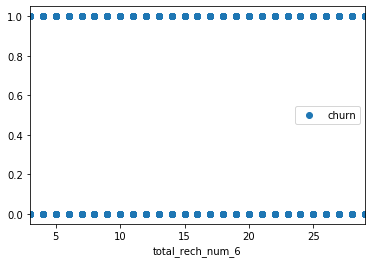

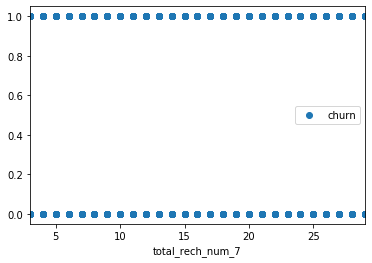

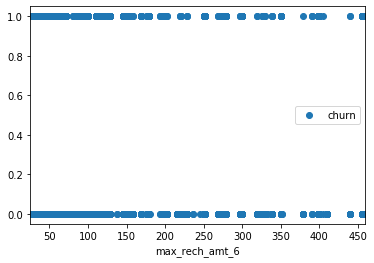

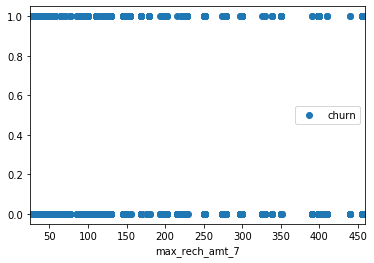

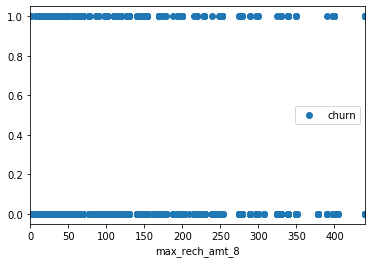

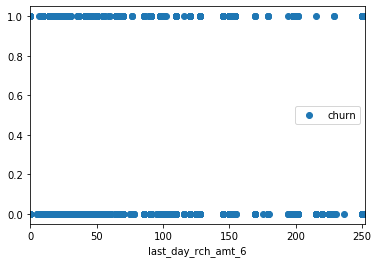

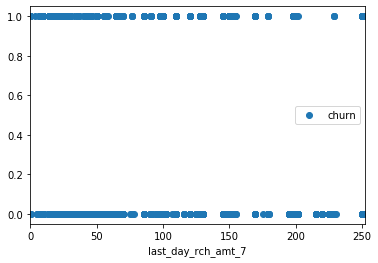

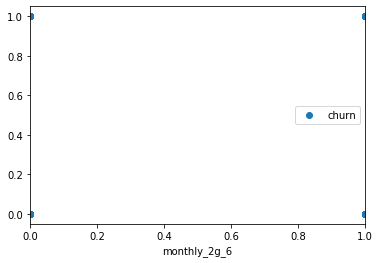

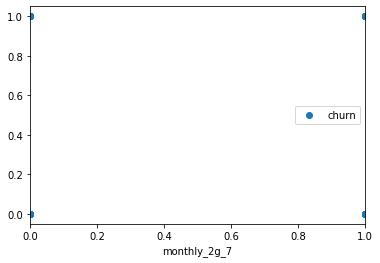

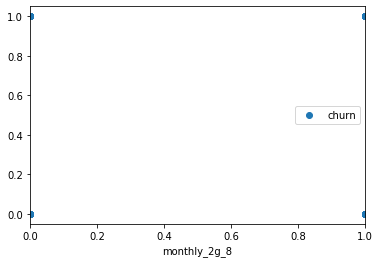

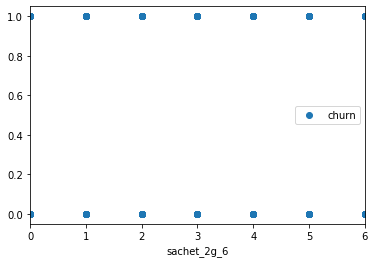

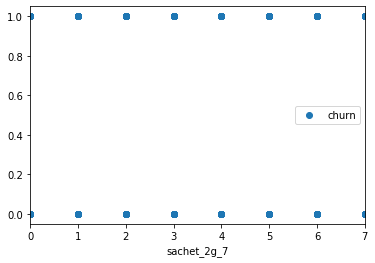

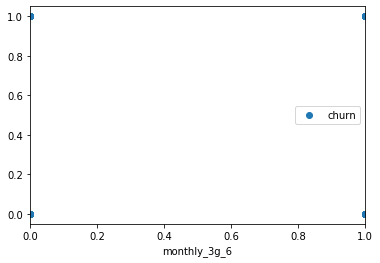

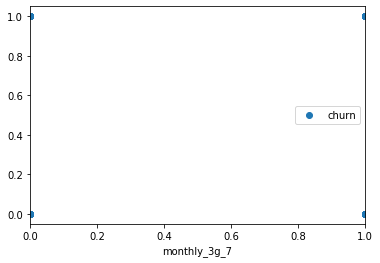

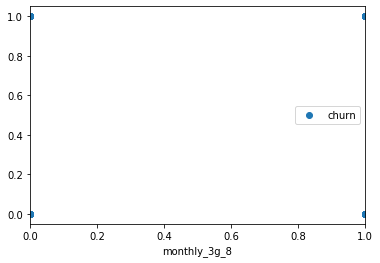

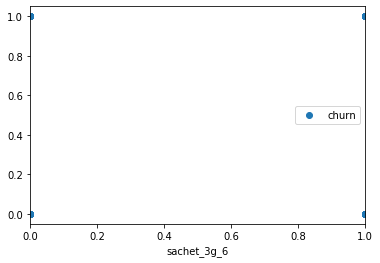

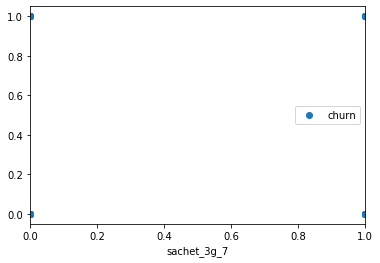

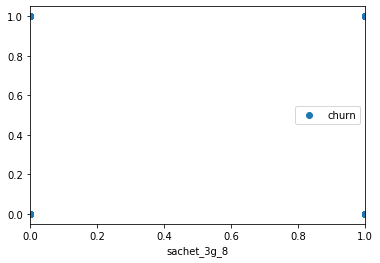

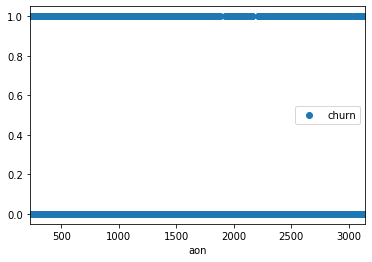

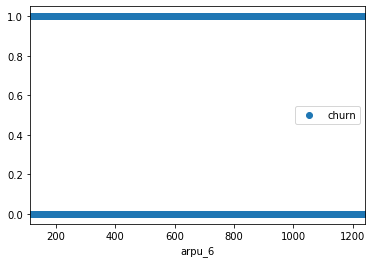

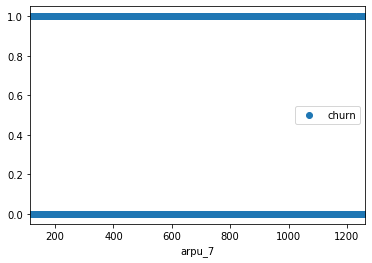

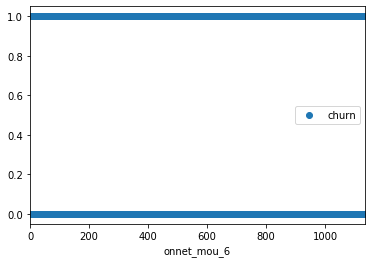

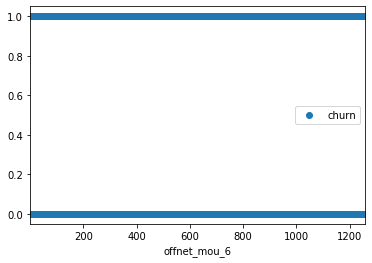

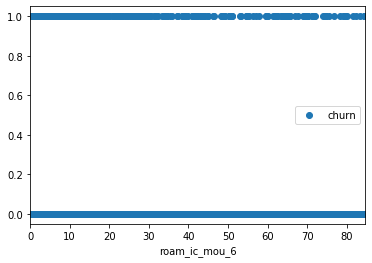

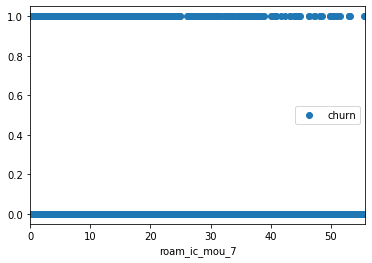

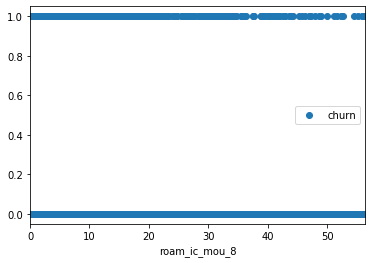

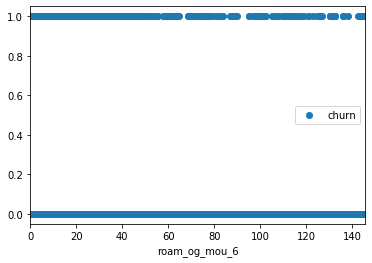

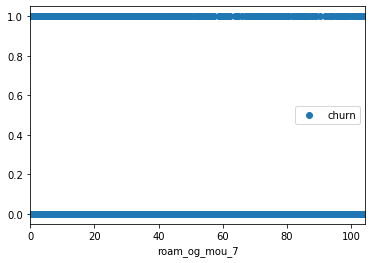

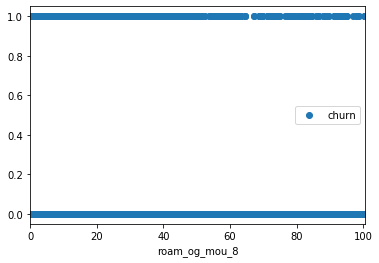

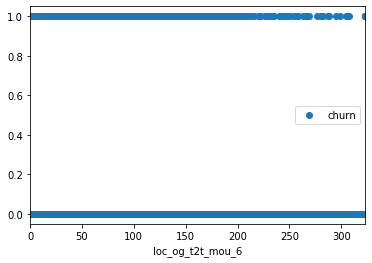

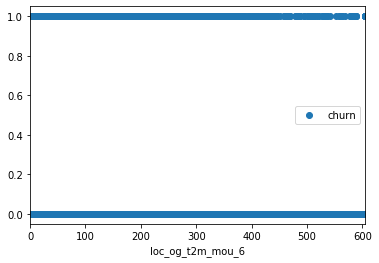

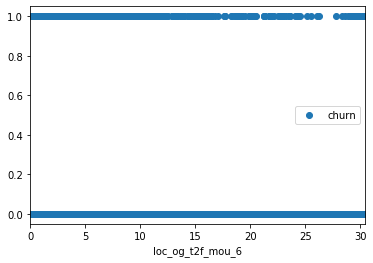

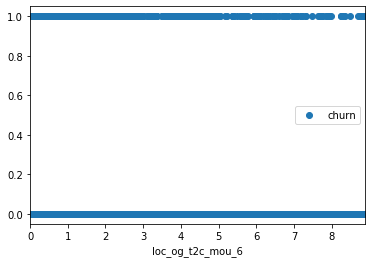

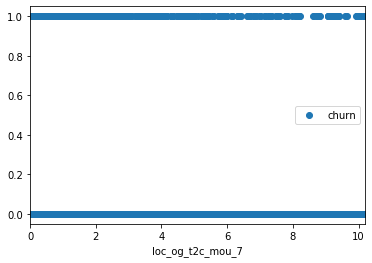

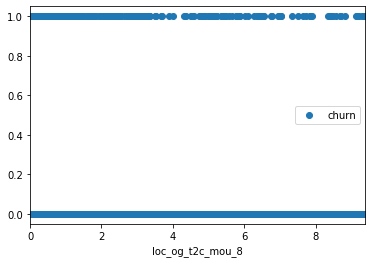

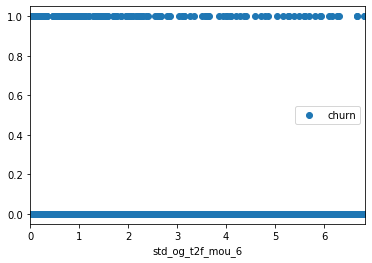

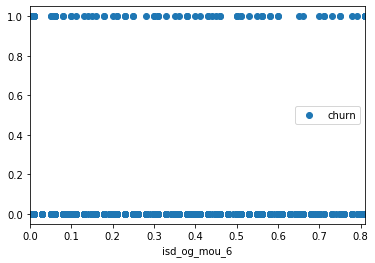

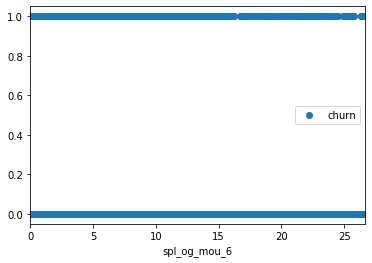

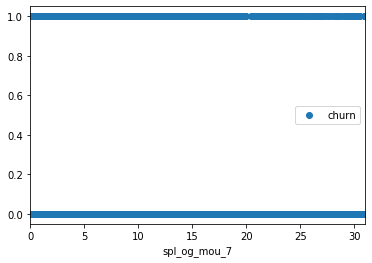

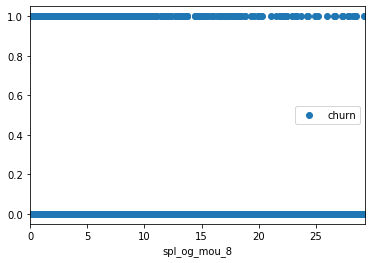

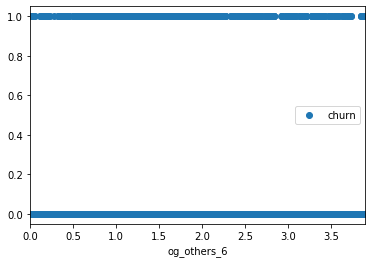

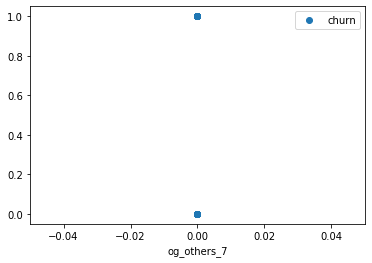

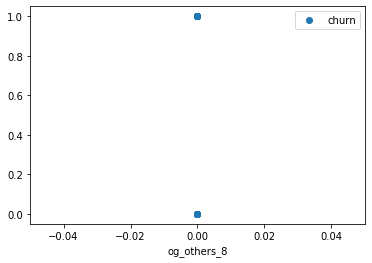

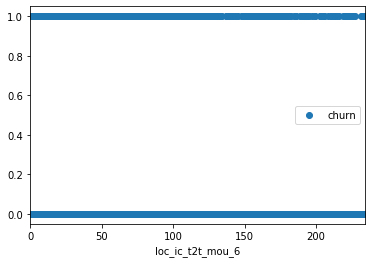

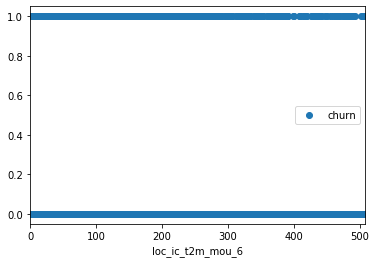

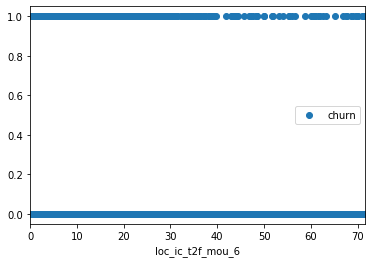

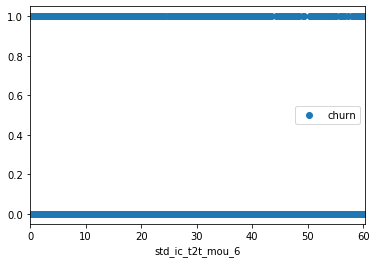

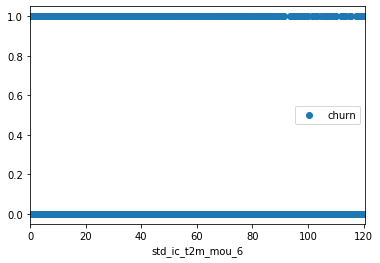

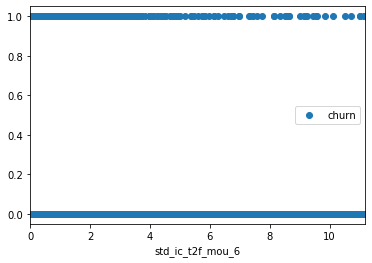

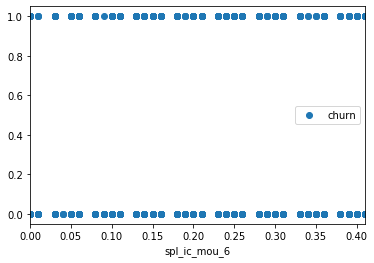

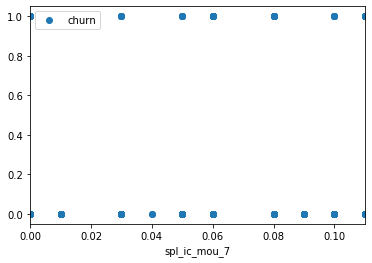

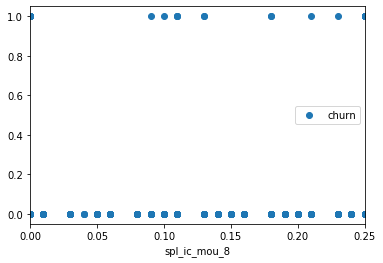

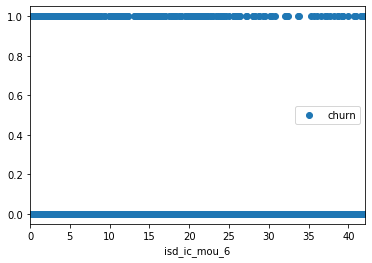

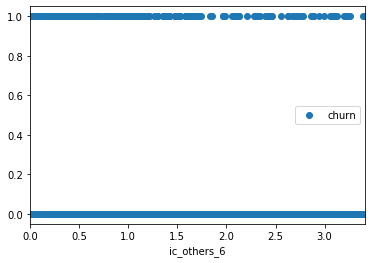

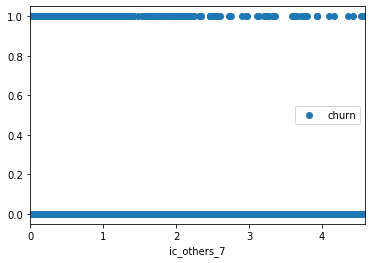

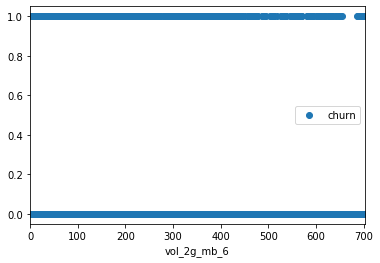

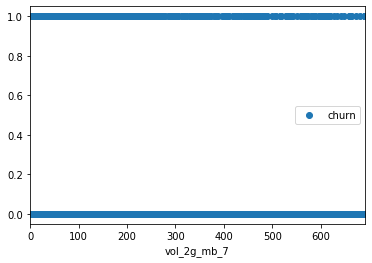

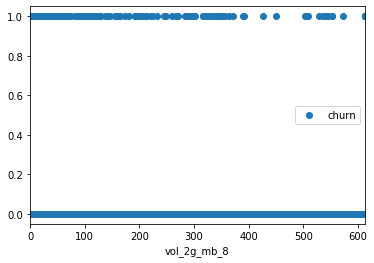

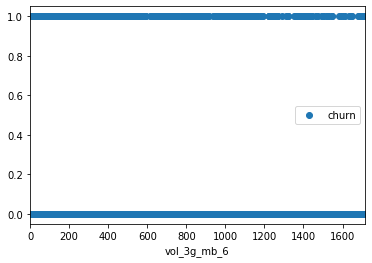

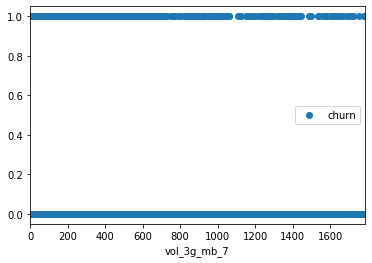

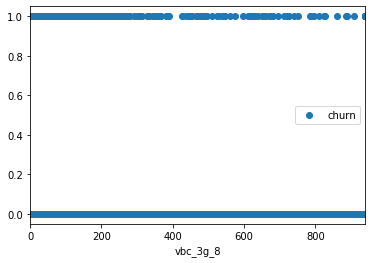

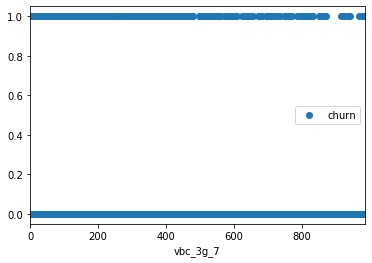

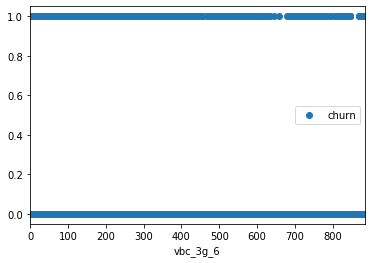

In [124]:
for column in ['total_rech_num_6', 'total_rech_num_7',
        'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
        'last_day_rch_amt_6', 'last_day_rch_amt_7', 'monthly_2g_6',
        'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7',
        'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6',
        'sachet_3g_7', 'sachet_3g_8', 'aon','arpu_6', 'arpu_7', 'onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6',
        'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7',
        'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6',
        'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7',
        'loc_og_t2c_mou_8', 'std_og_t2f_mou_6', 'isd_og_mou_6', 'spl_og_mou_6',
        'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7',
        'og_others_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6',
        'loc_ic_t2f_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6',
        'std_ic_t2f_mou_6', 'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8',
        'isd_ic_mou_6', 'ic_others_6', 'ic_others_7', 'vol_2g_mb_6',
        'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7', 'vbc_3g_8',
        'vbc_3g_7', 'vbc_3g_6']:
    high_value_cust.plot(x=column, y='churn', style='o')

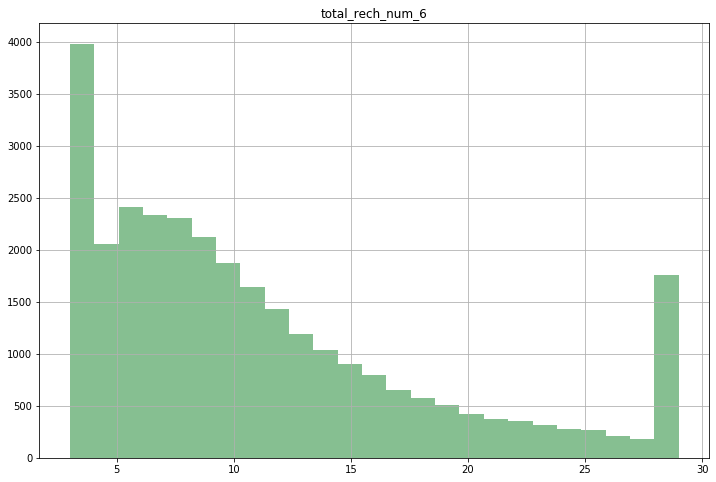

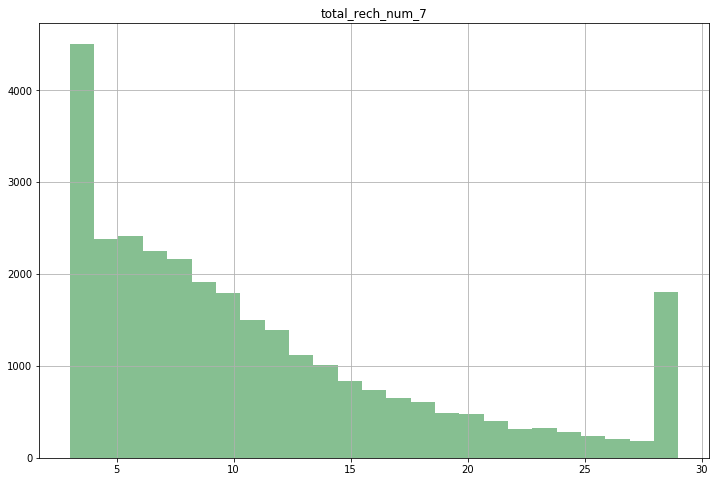

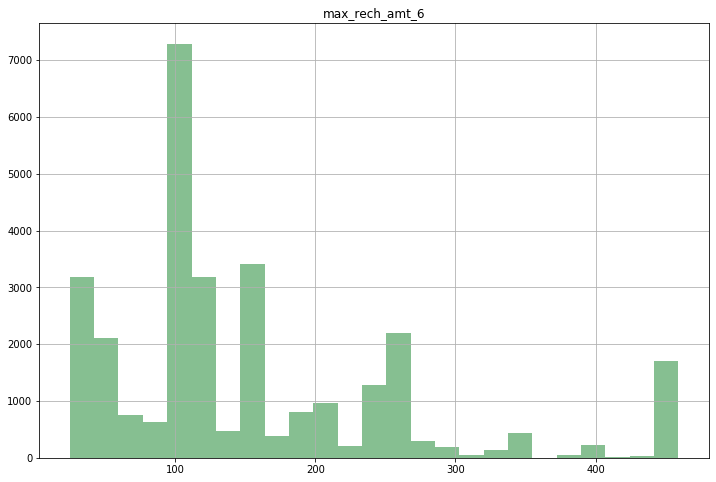

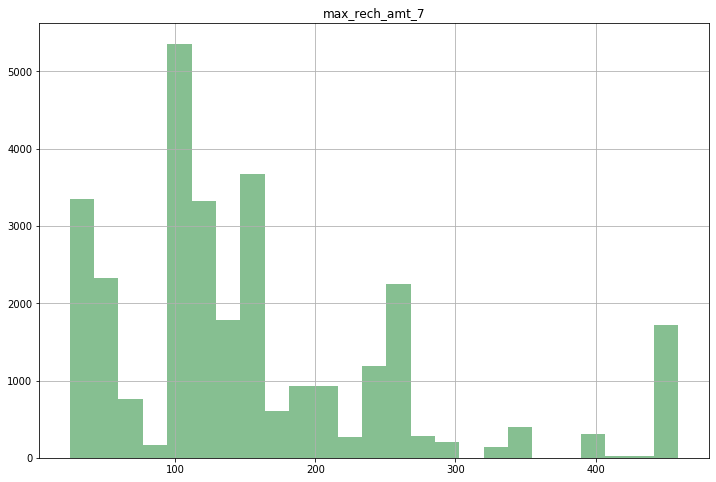

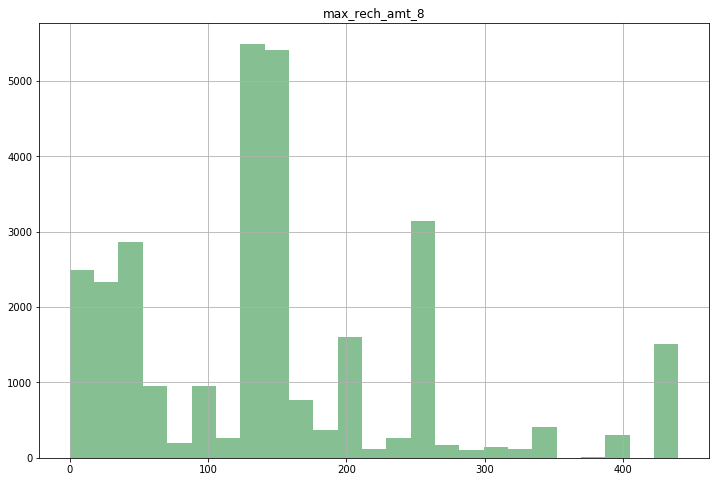

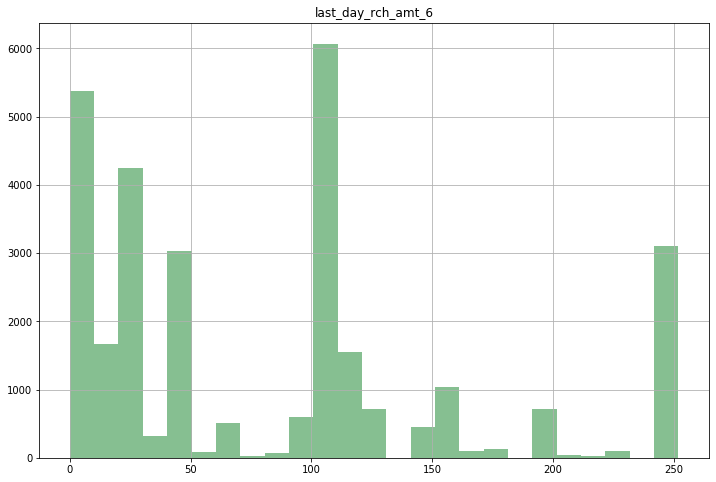

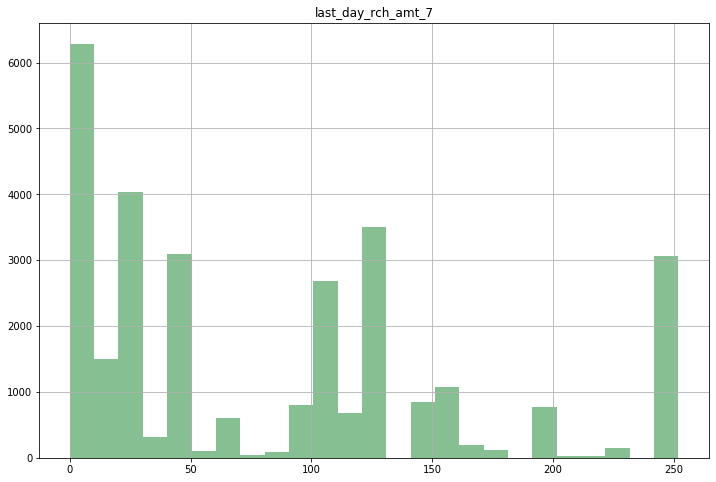

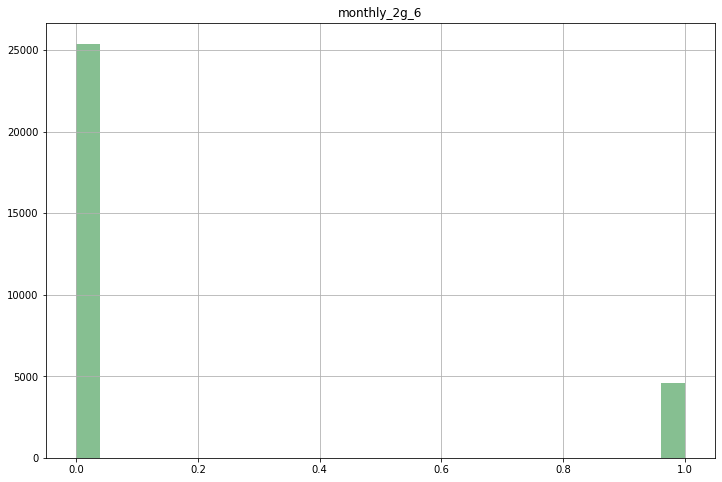

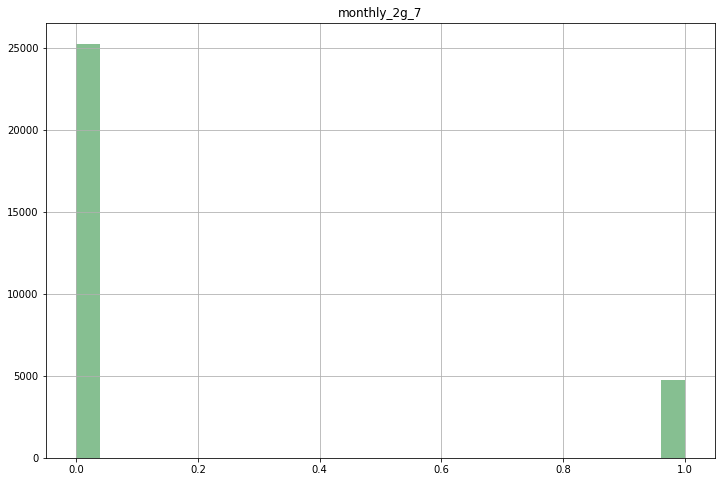

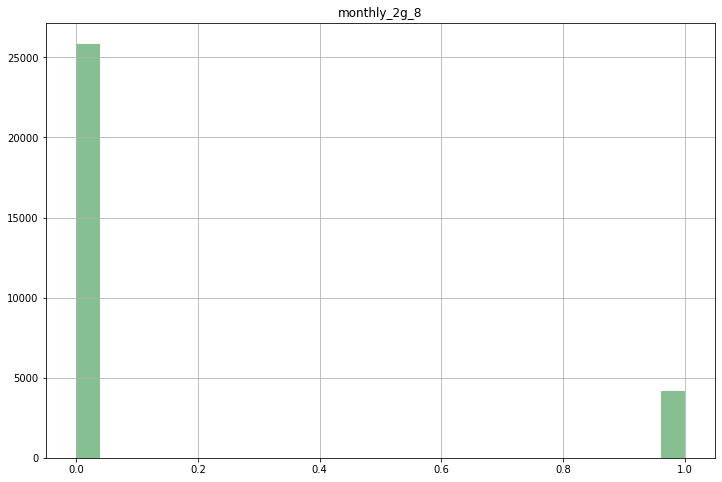

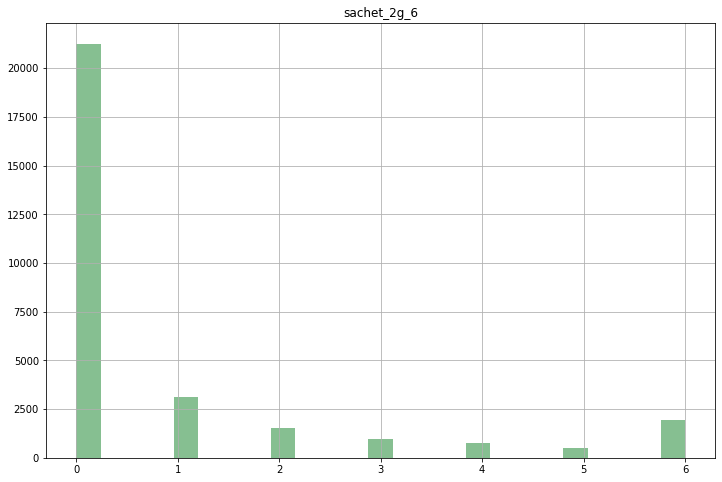

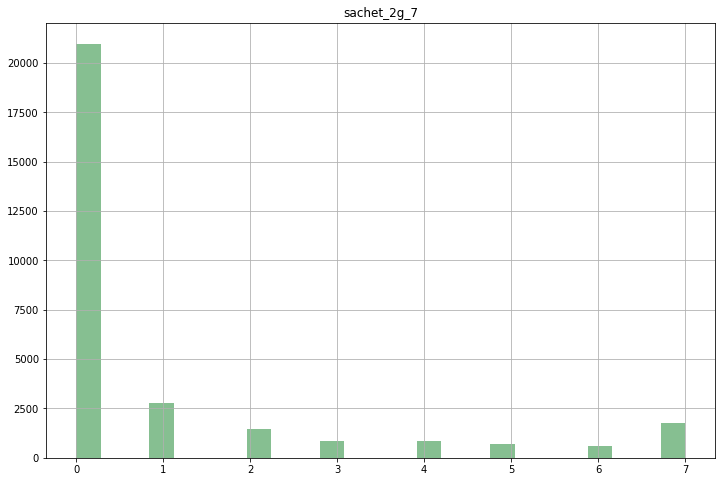

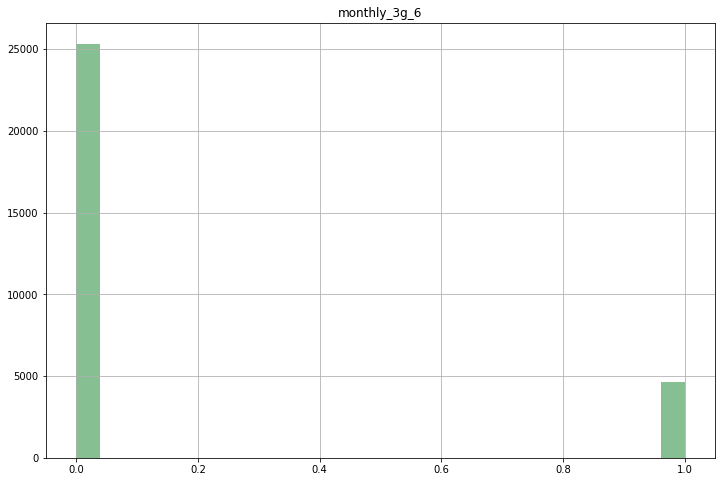

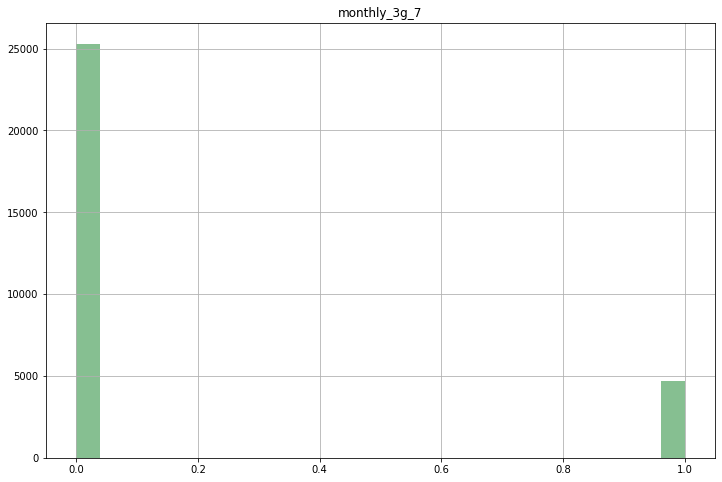

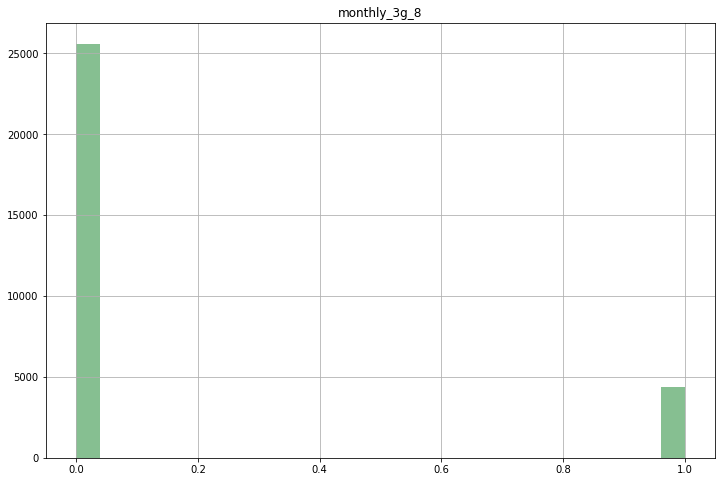

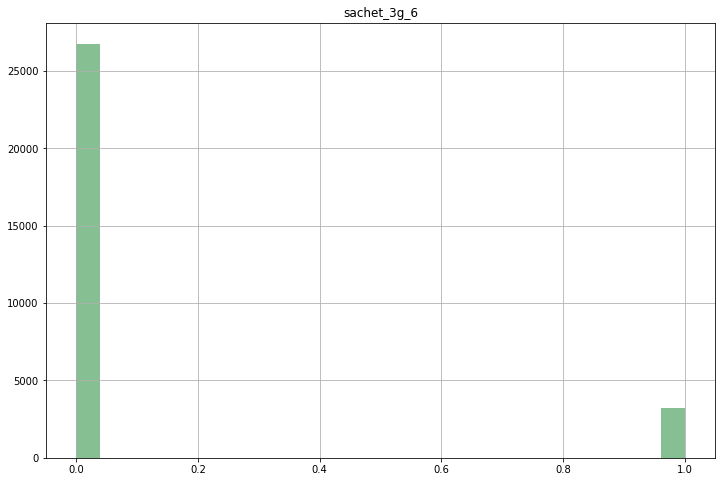

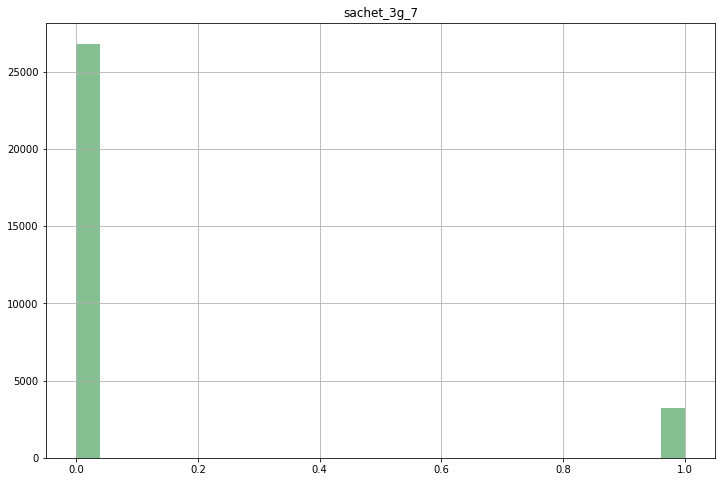

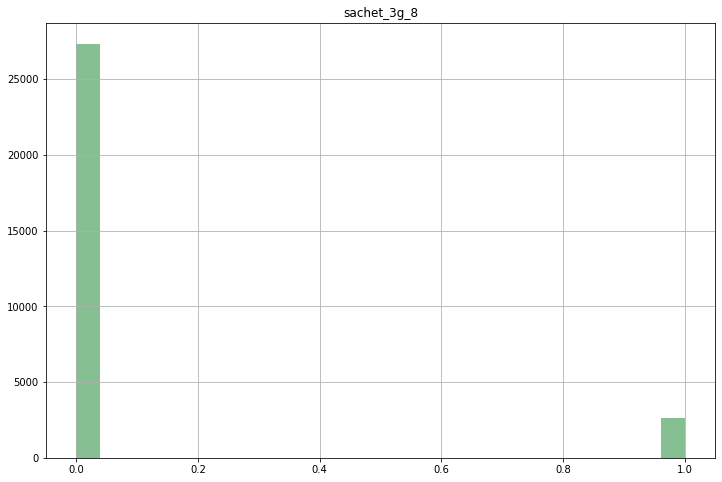

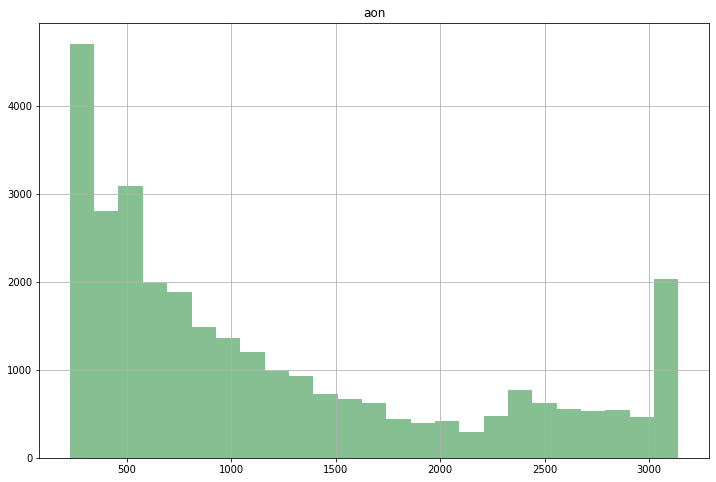

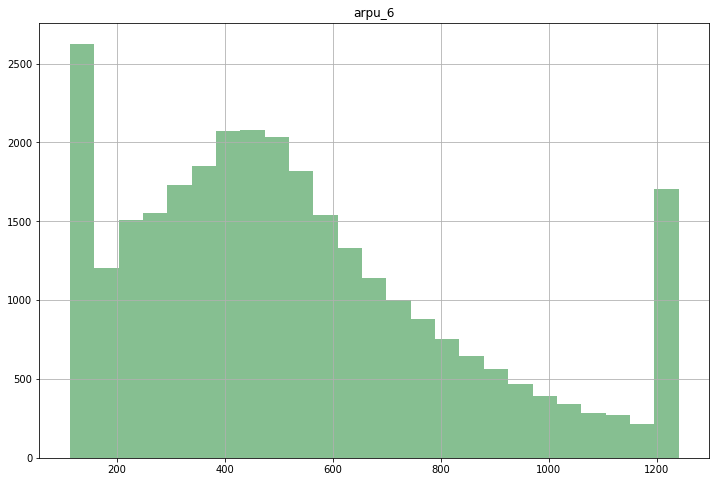

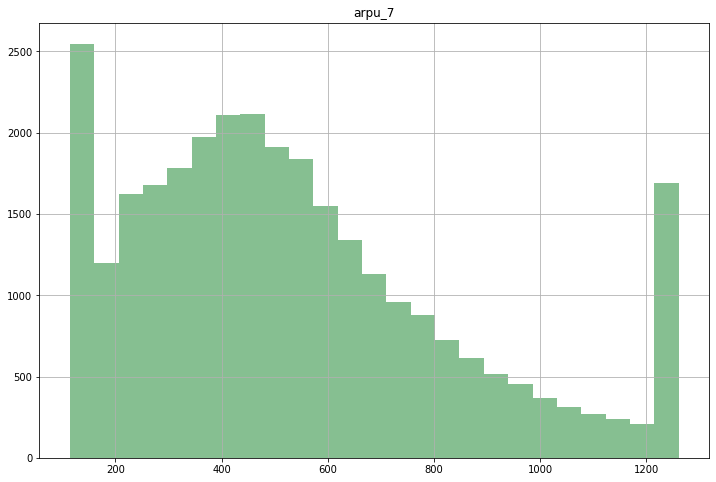

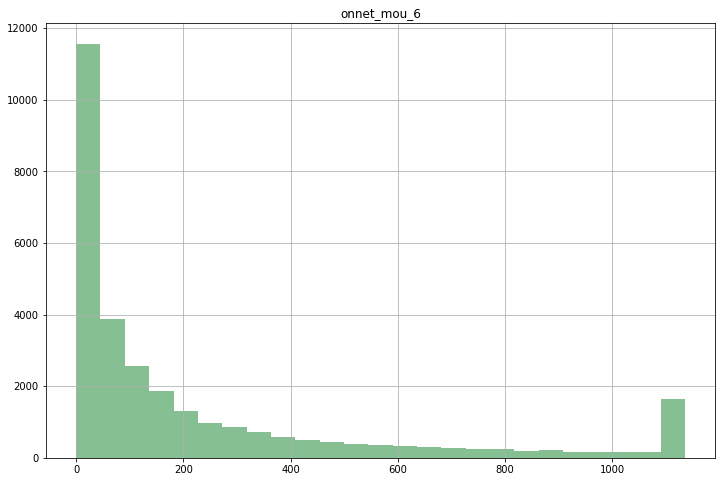

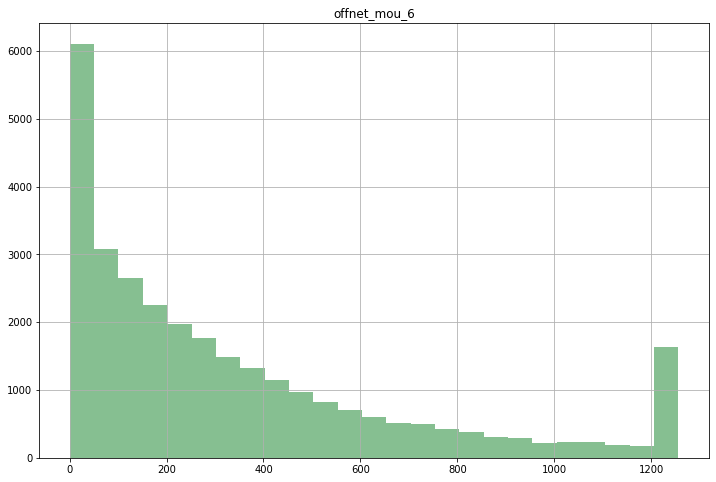

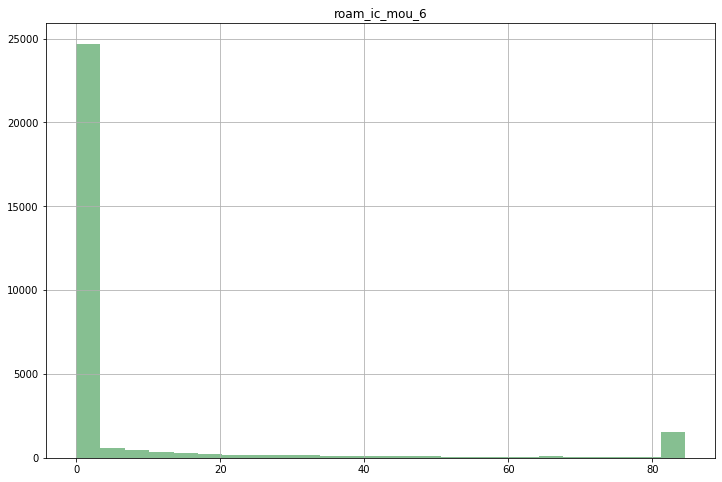

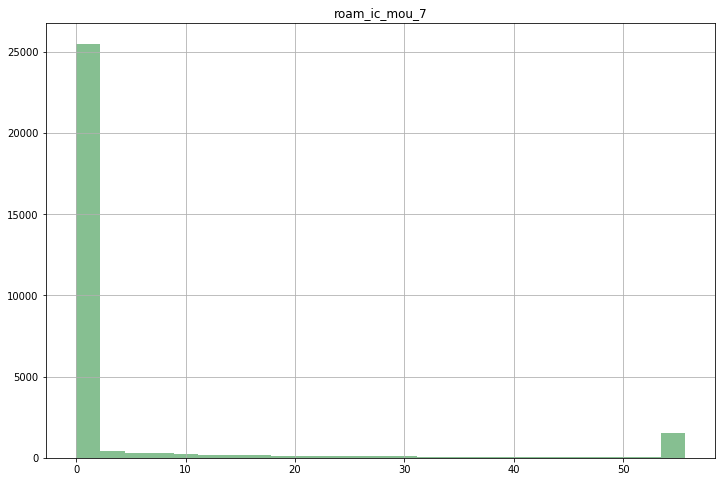

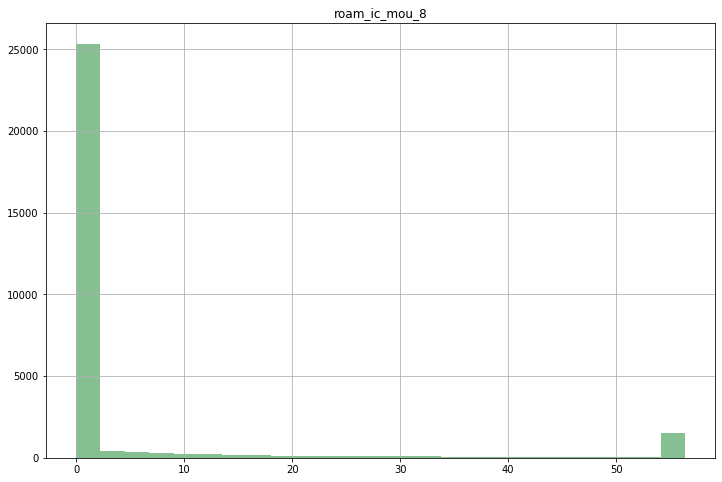

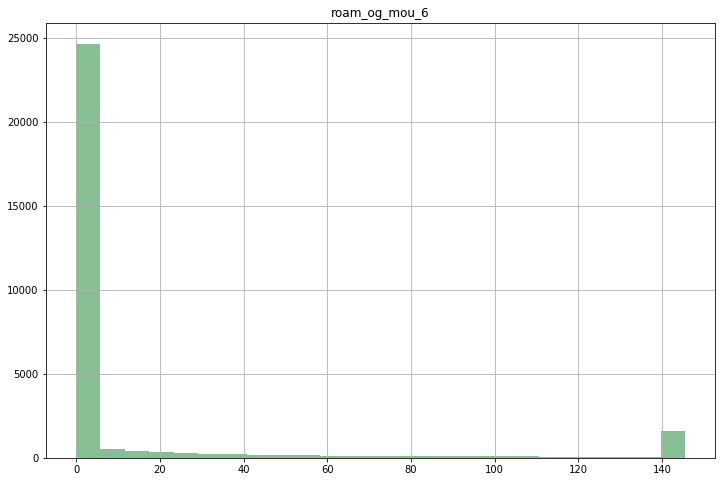

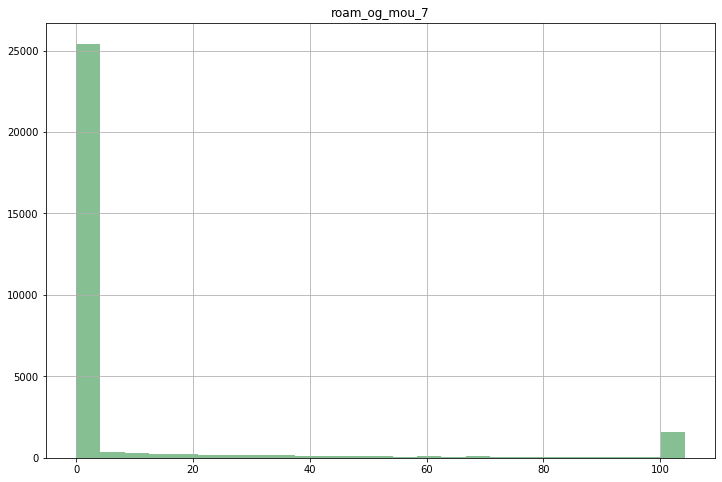

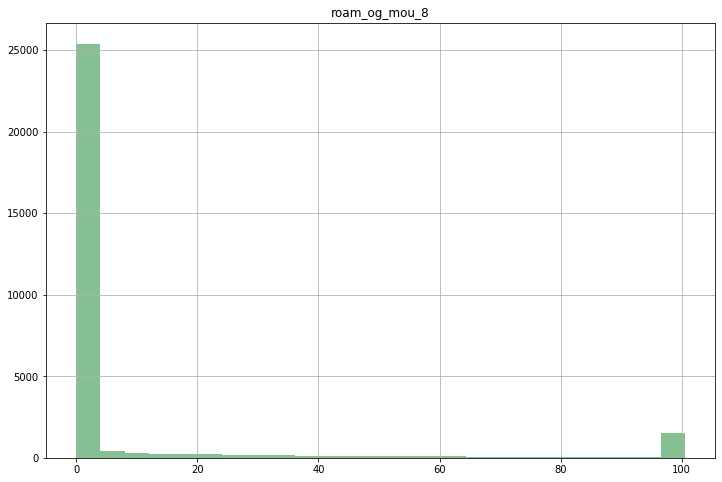

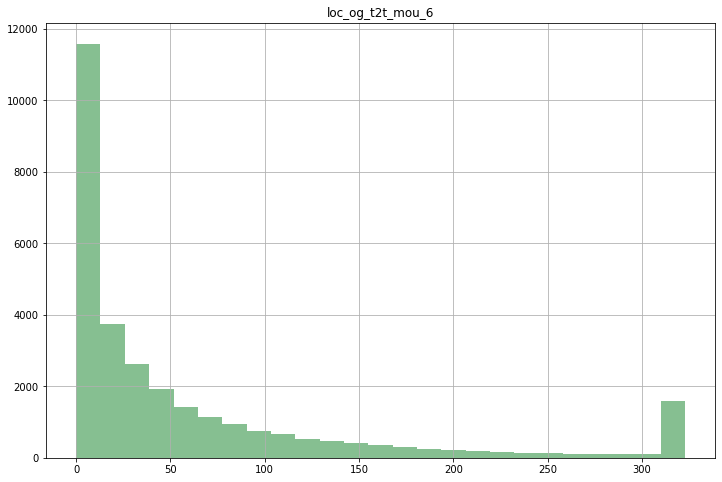

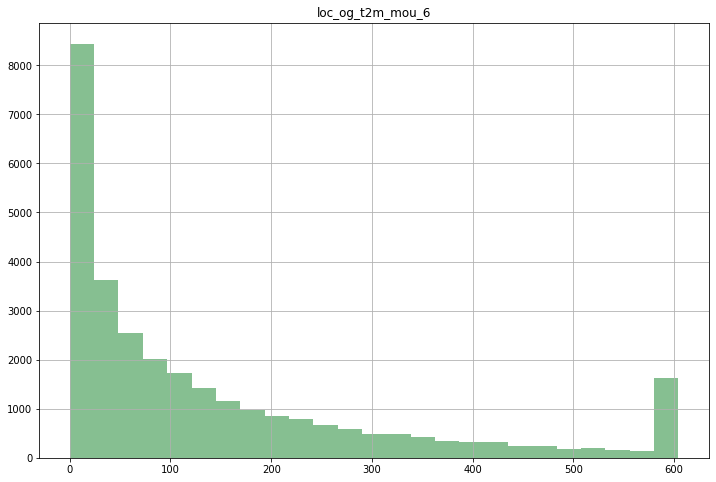

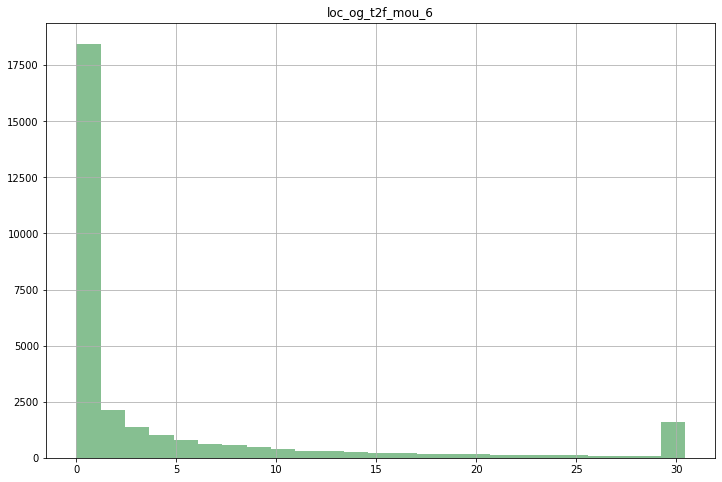

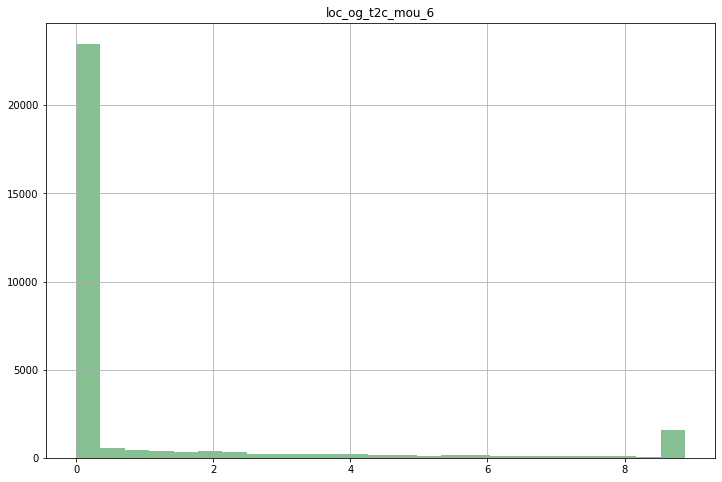

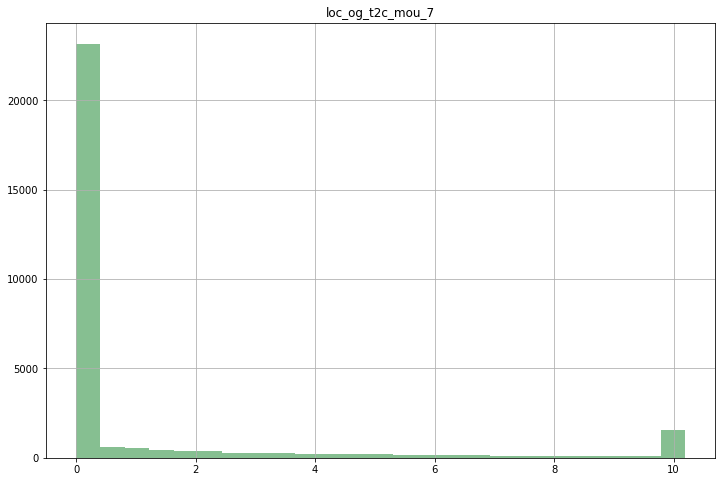

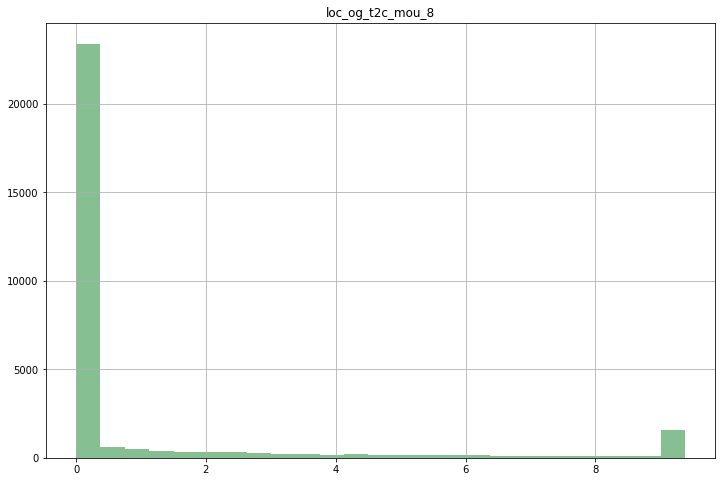

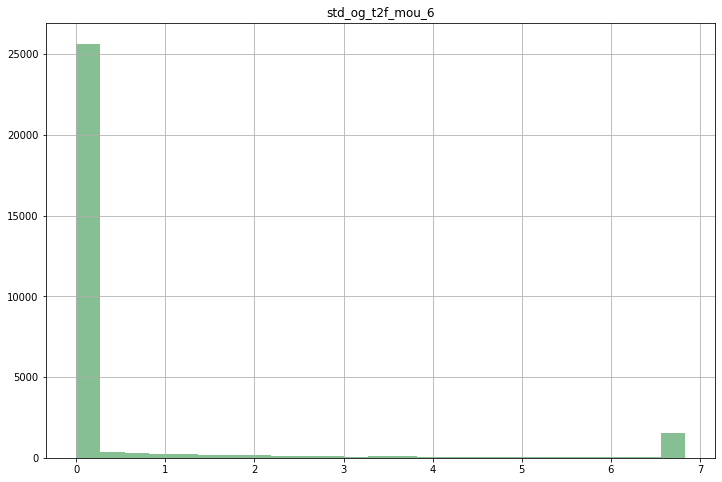

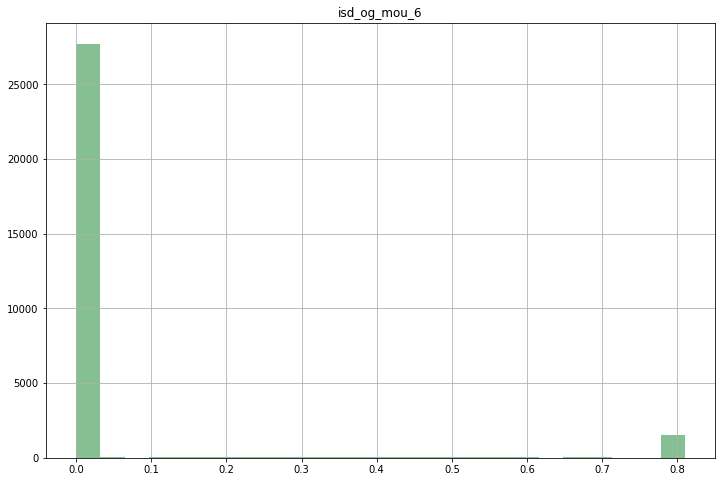

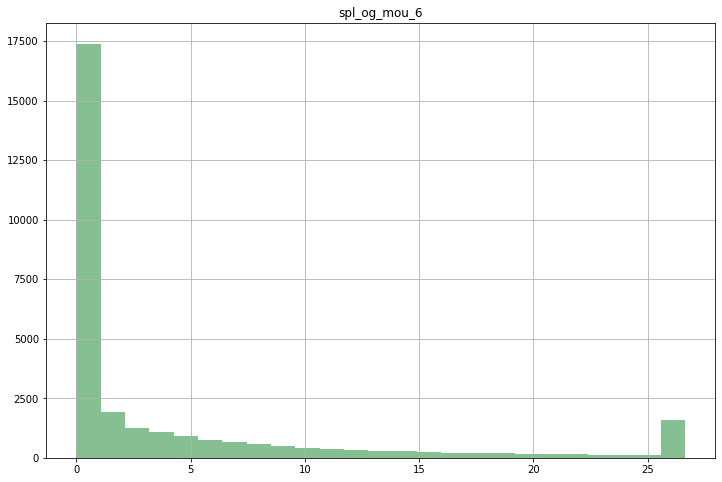

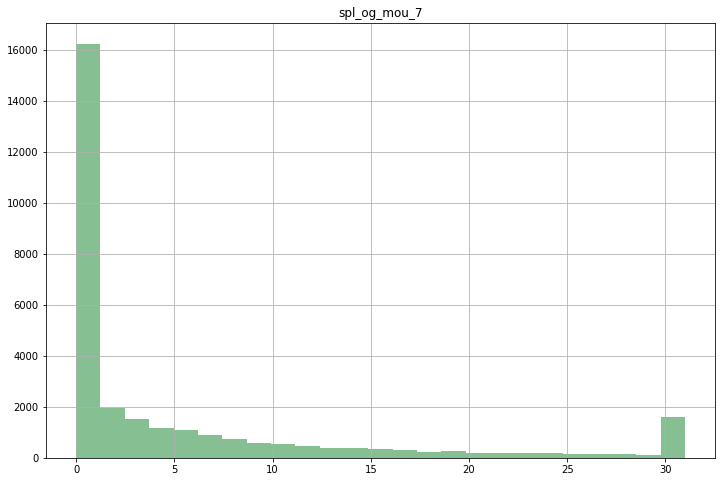

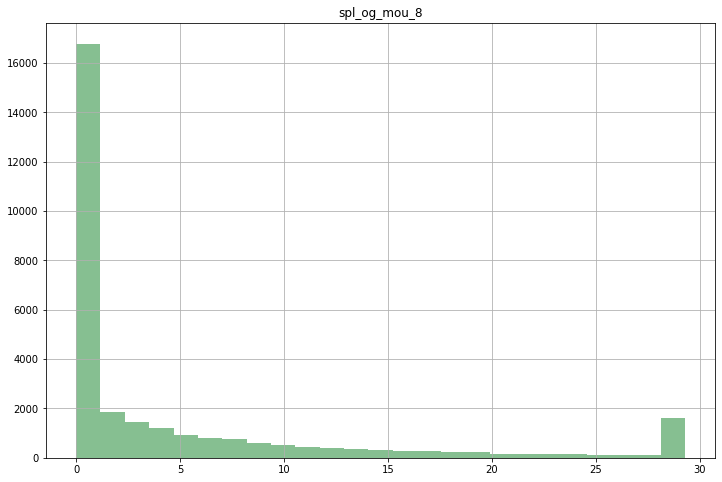

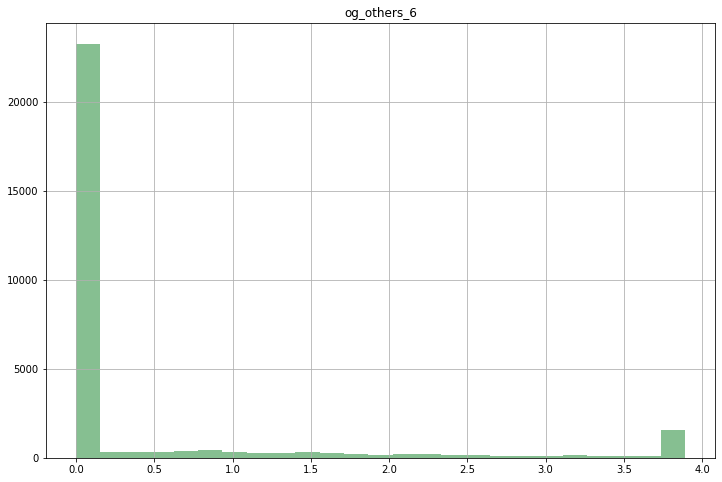

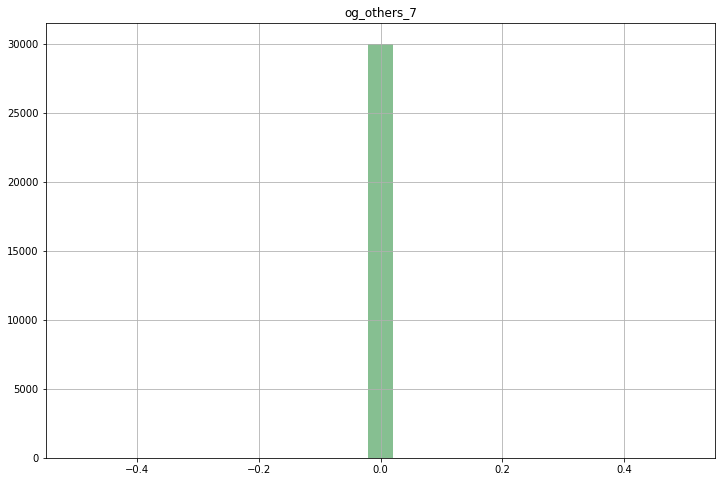

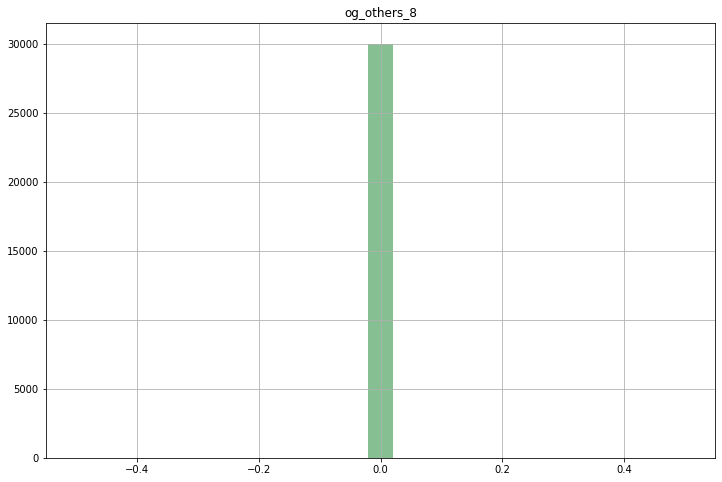

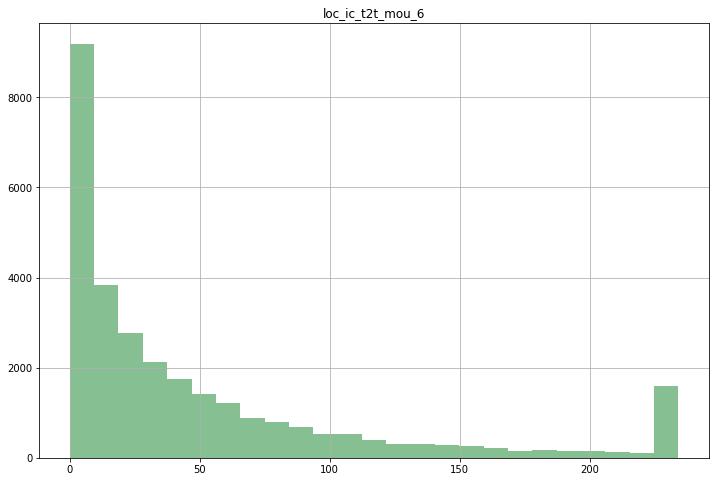

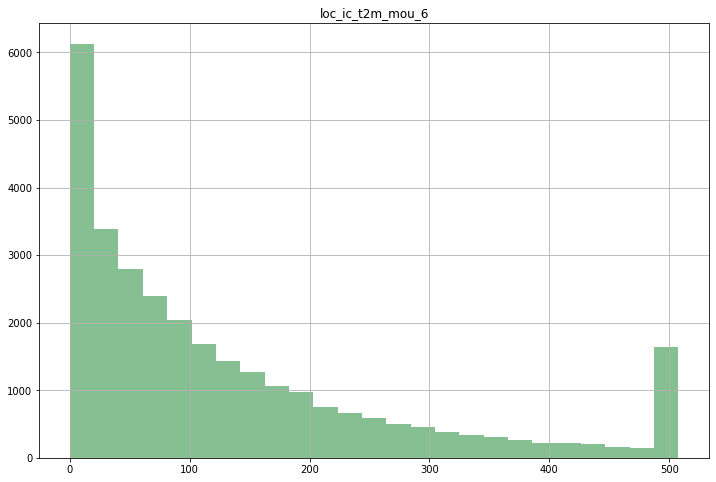

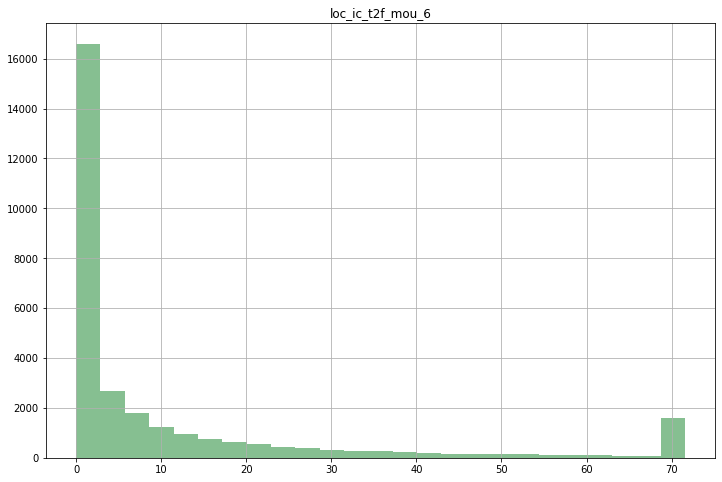

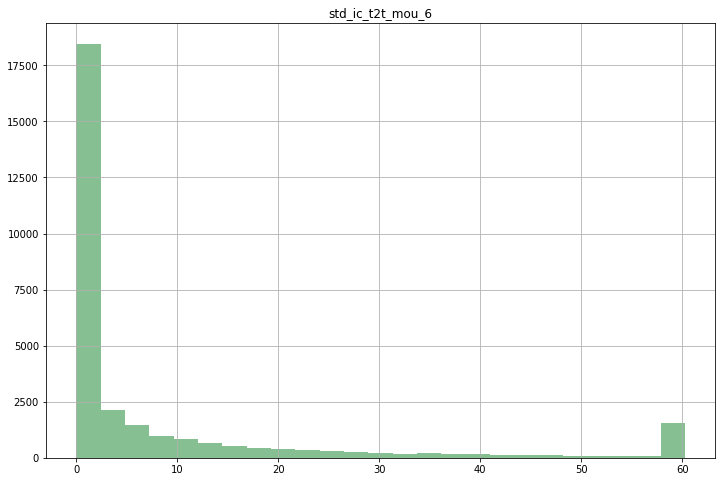

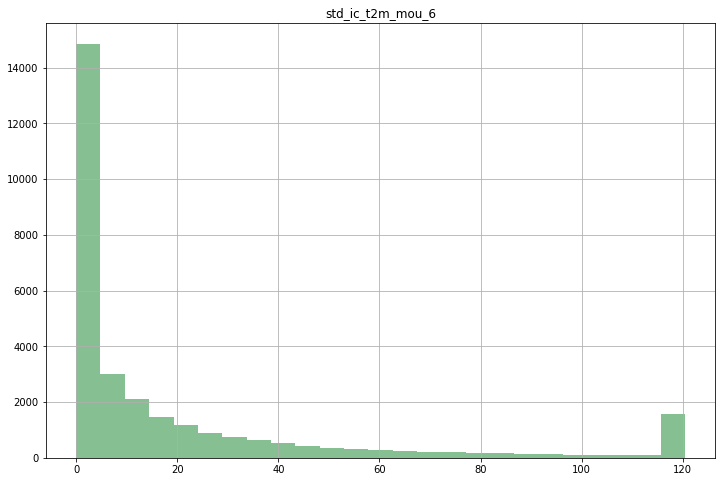

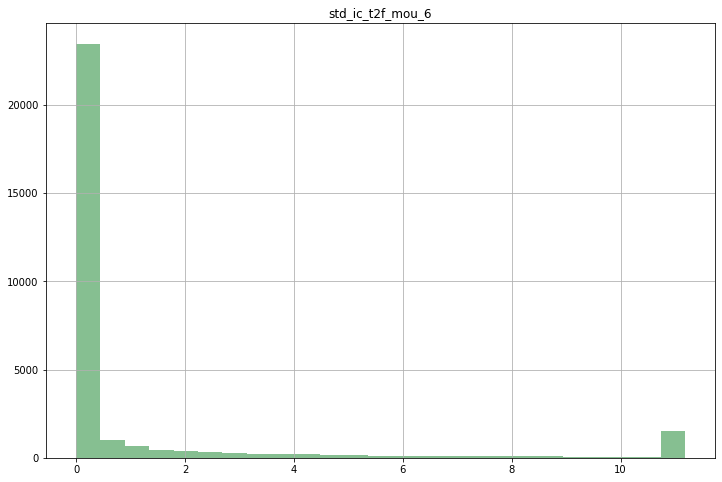

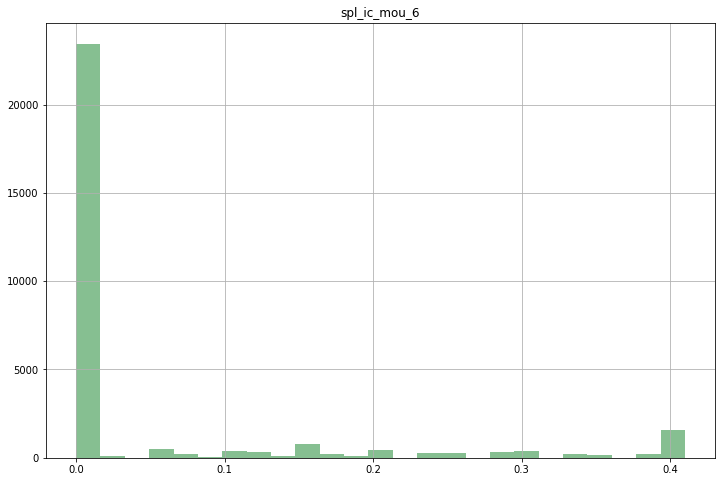

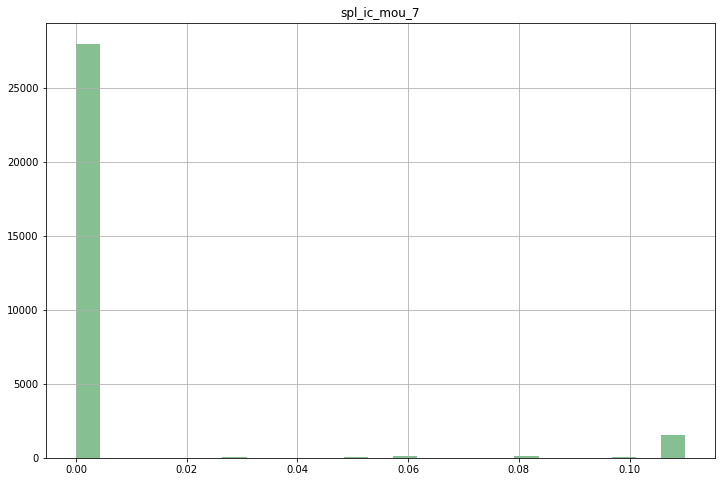

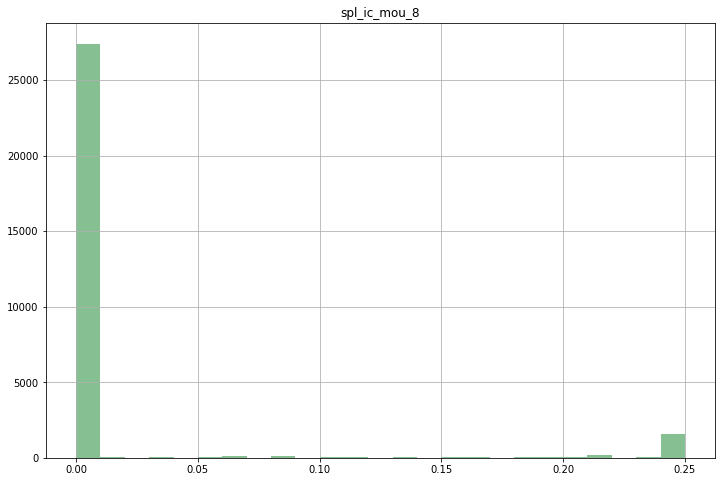

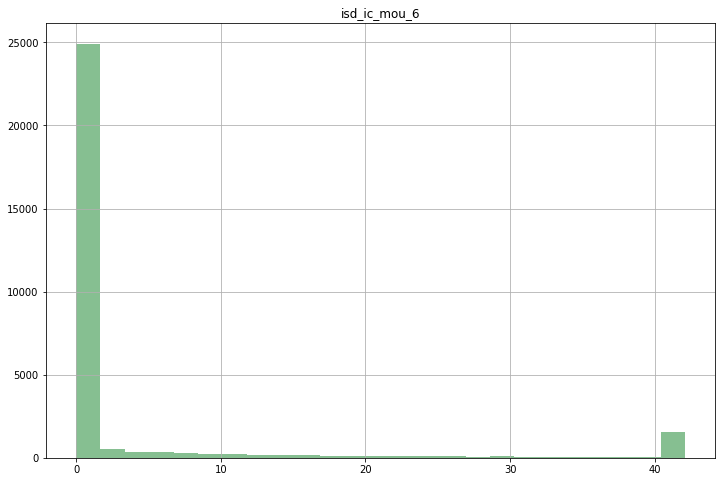

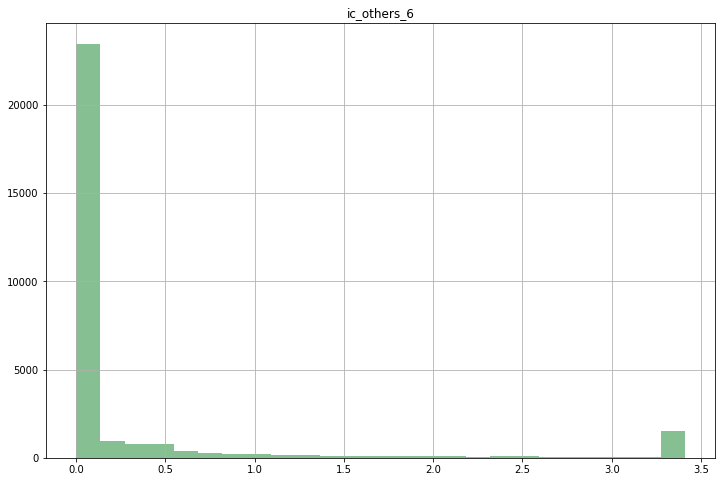

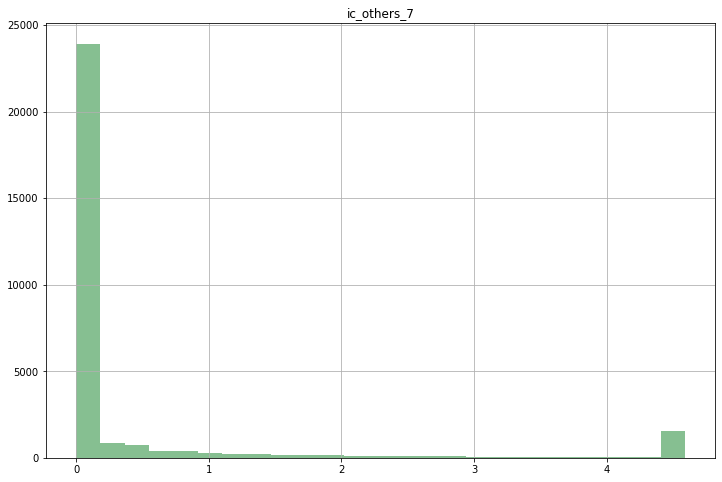

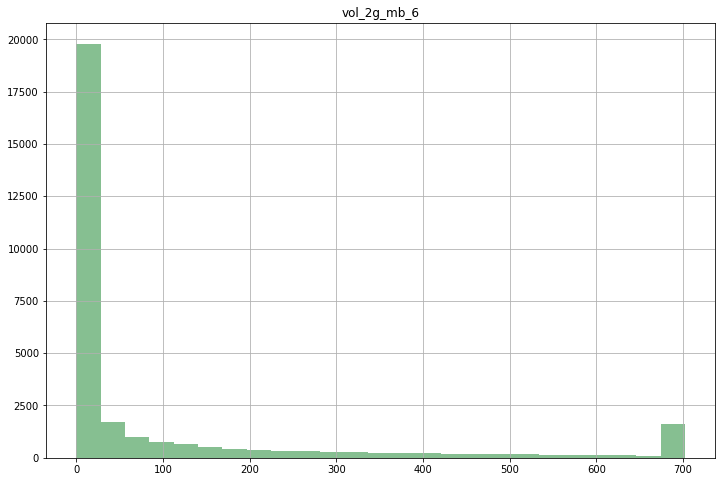

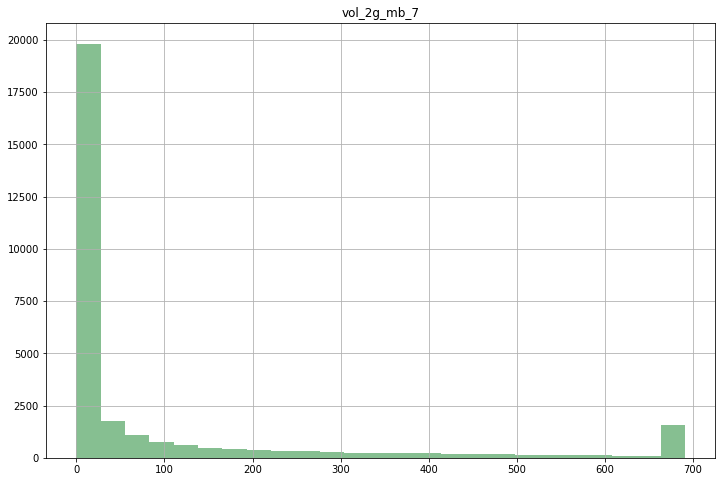

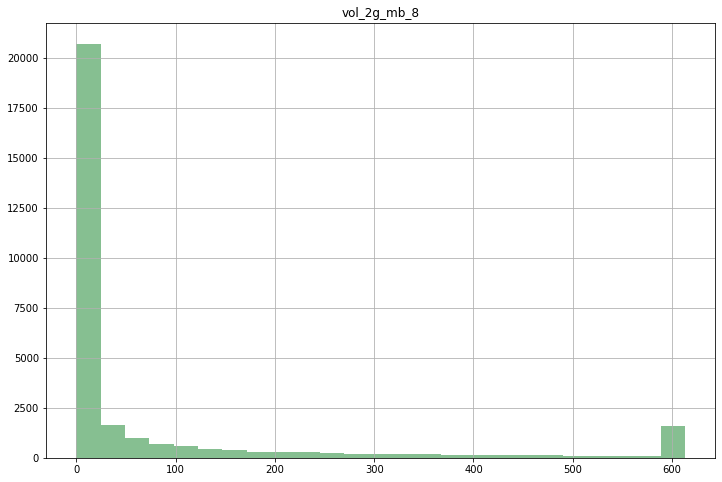

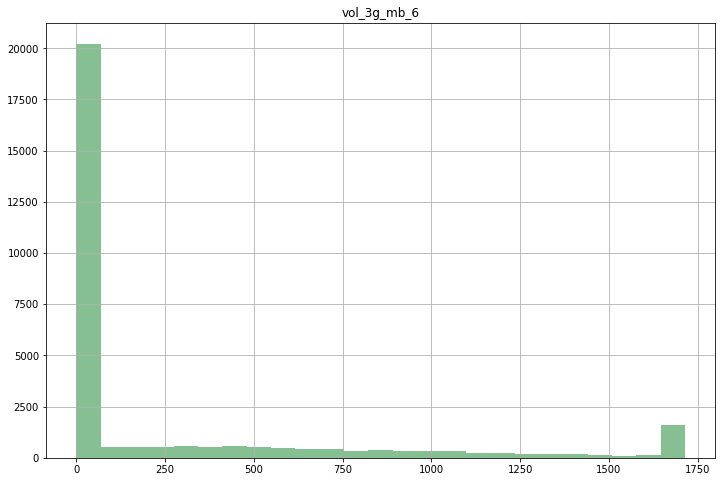

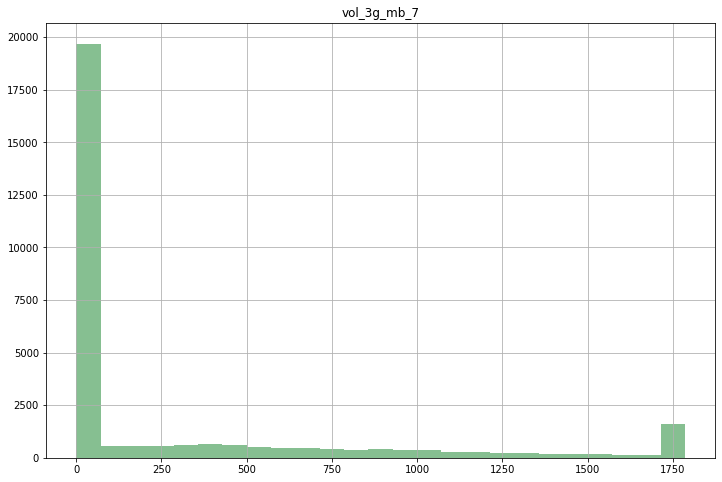

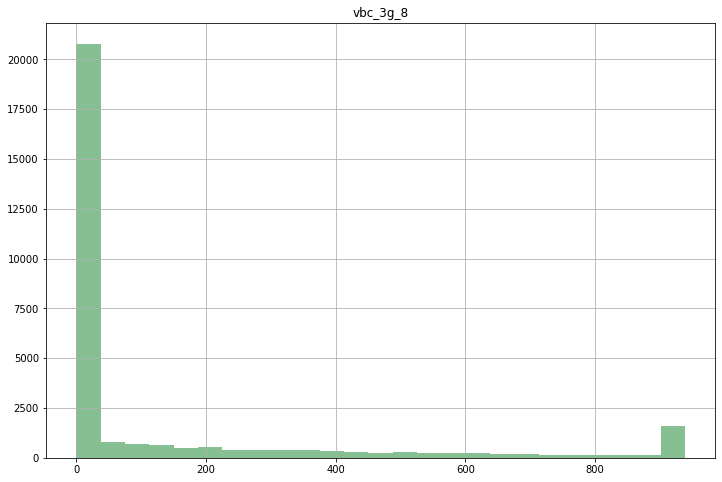

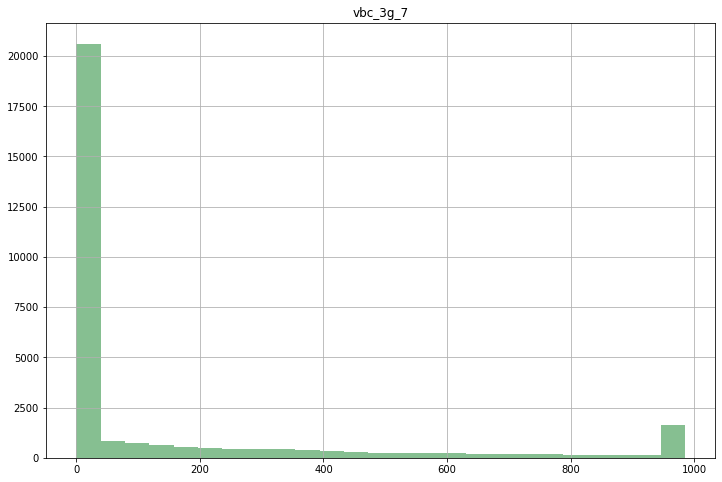

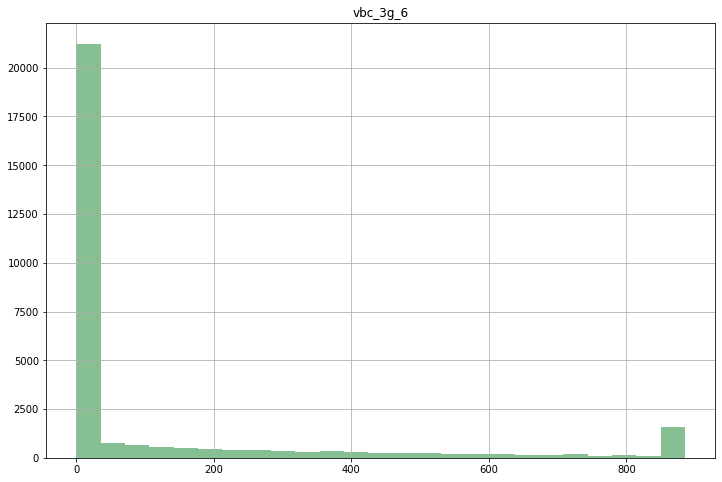

In [125]:
for column in ['total_rech_num_6', 'total_rech_num_7',
        'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
        'last_day_rch_amt_6', 'last_day_rch_amt_7', 'monthly_2g_6',
        'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7',
        'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6',
        'sachet_3g_7', 'sachet_3g_8', 'aon','arpu_6', 'arpu_7', 'onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6',
        'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7',
        'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6',
        'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7',
        'loc_og_t2c_mou_8', 'std_og_t2f_mou_6', 'isd_og_mou_6', 'spl_og_mou_6',
        'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7',
        'og_others_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6',
        'loc_ic_t2f_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6',
        'std_ic_t2f_mou_6', 'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8',
        'isd_ic_mou_6', 'ic_others_6', 'ic_others_7', 'vol_2g_mb_6',
        'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7', 'vbc_3g_8',
        'vbc_3g_7', 'vbc_3g_6']:
        high_value_cust.hist(column=column,bins=25, figsize=(12,8), color='#86bf91')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F5814AB7B8>]],
      dtype=object)

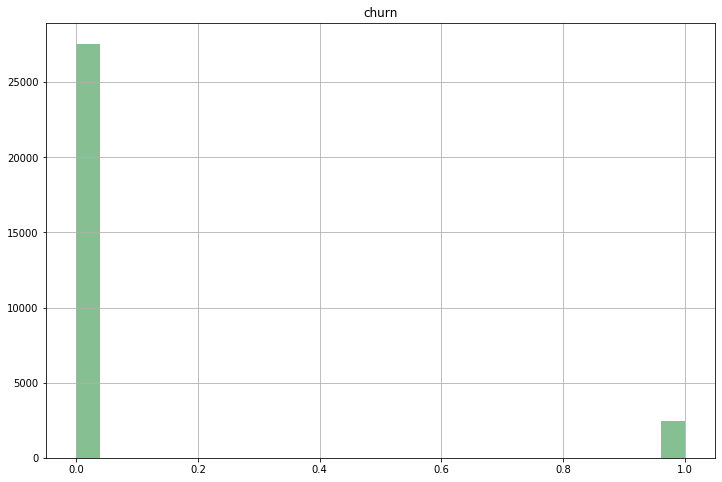

In [126]:
high_value_cust.hist(column='churn',bins=25, figsize=(12,8), color='#86bf91')

In [127]:
#Checking Churn Imbalance ratio:
churn=(sum(high_value_cust['churn'])/len(high_value_cust['churn'].index))*100
churn

8.136395453484884

#### As it can be seen from churn ratio is 8.13% and histogram plotting, there is a class imbalance which needs to be handled.

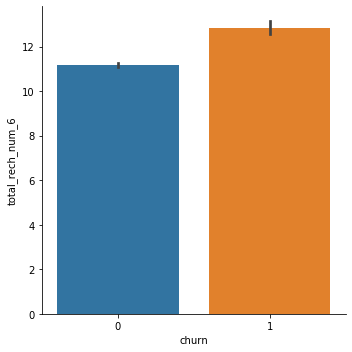

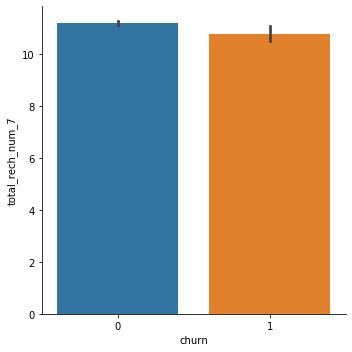

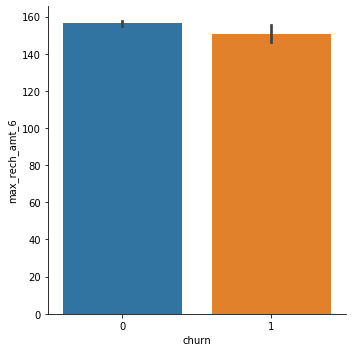

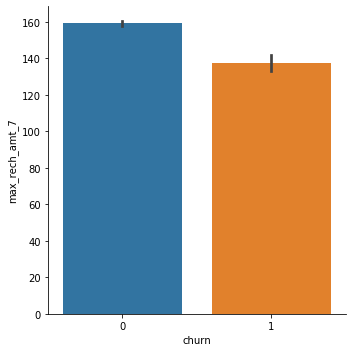

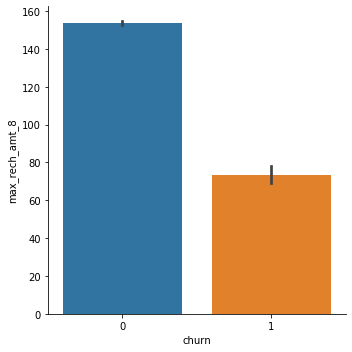

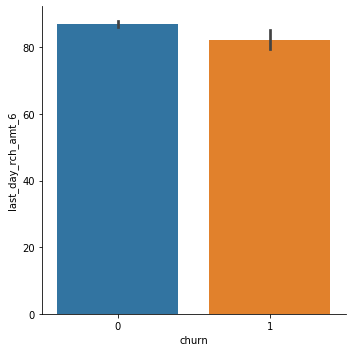

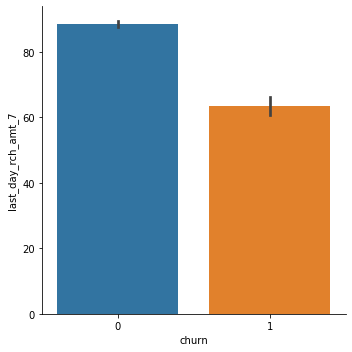

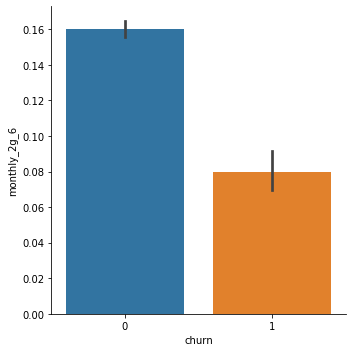

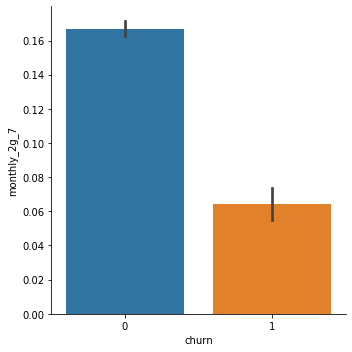

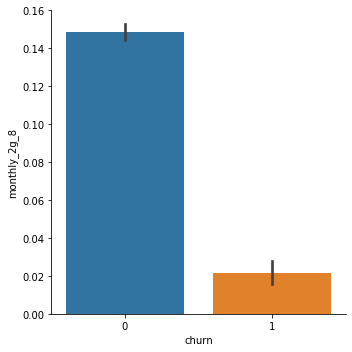

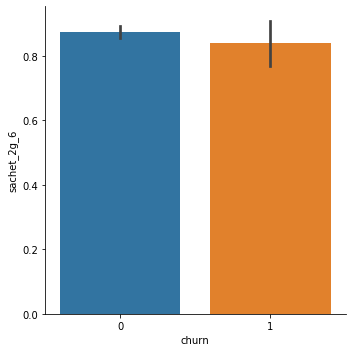

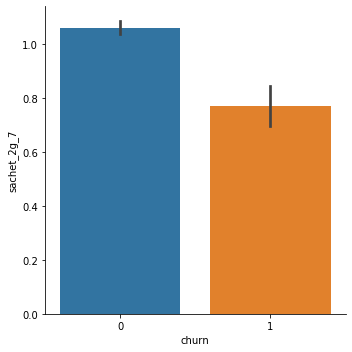

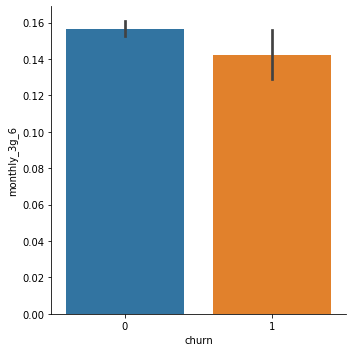

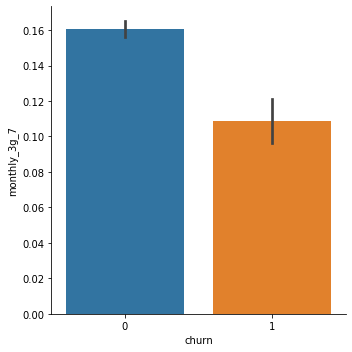

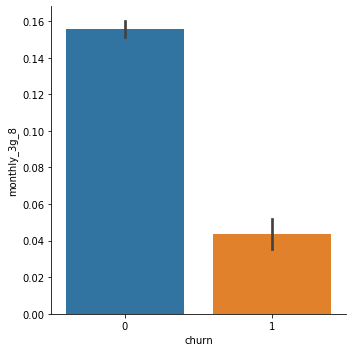

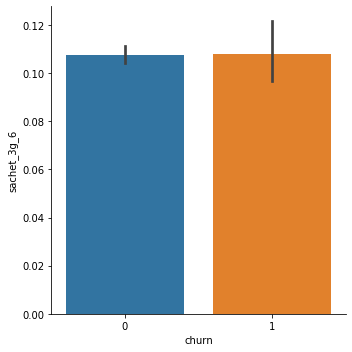

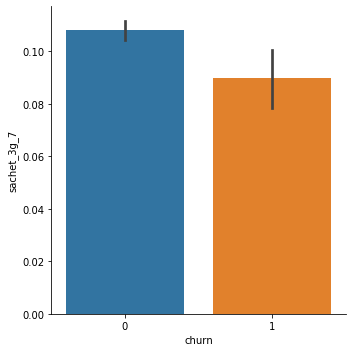

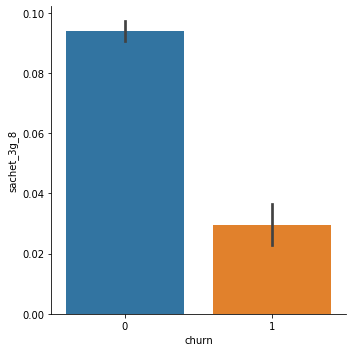

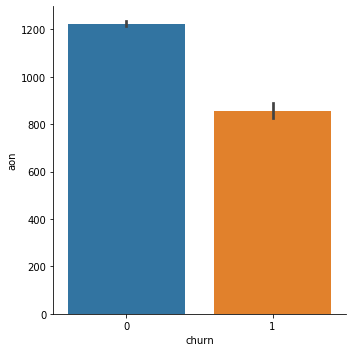

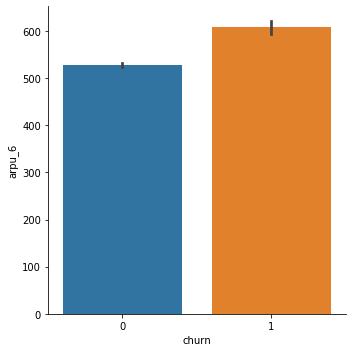

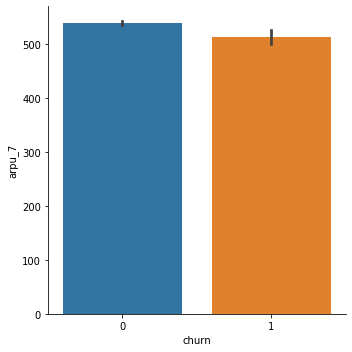

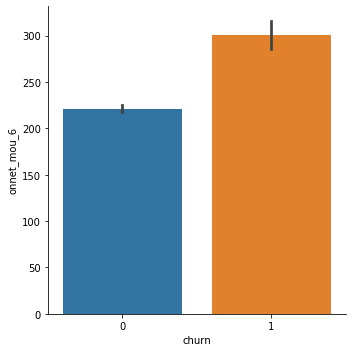

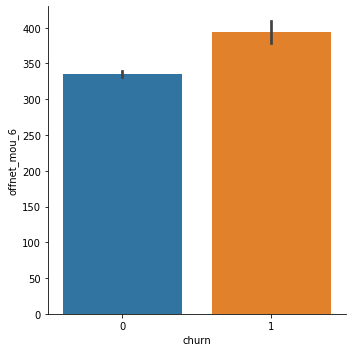

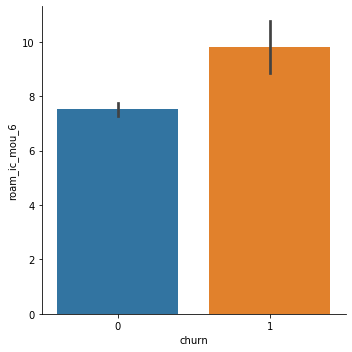

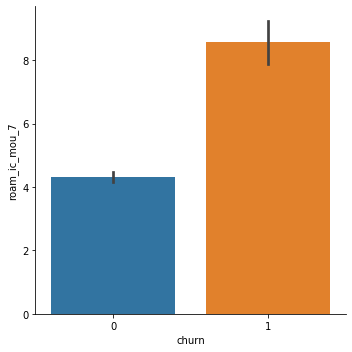

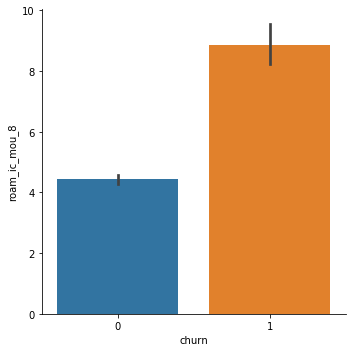

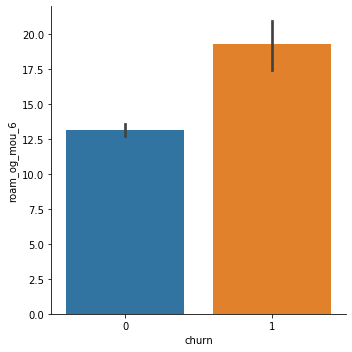

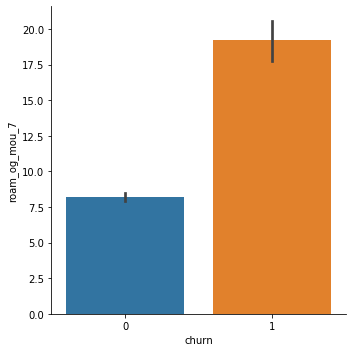

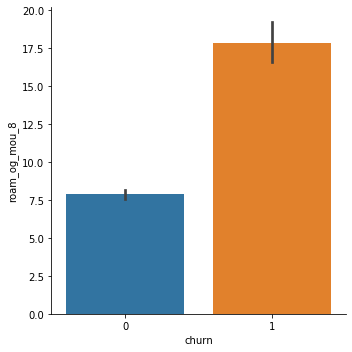

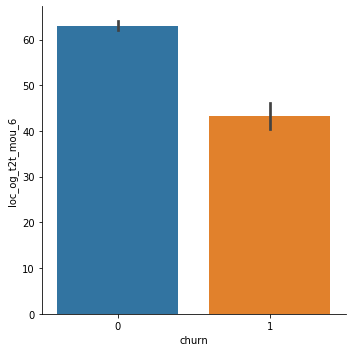

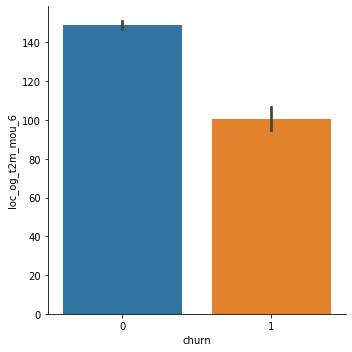

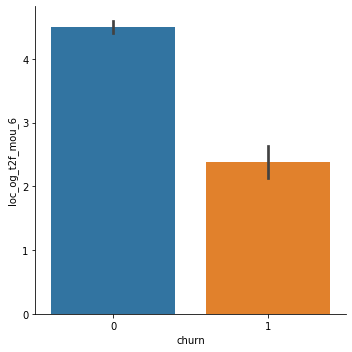

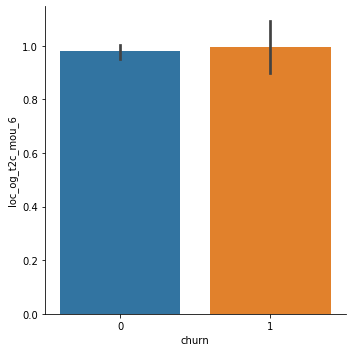

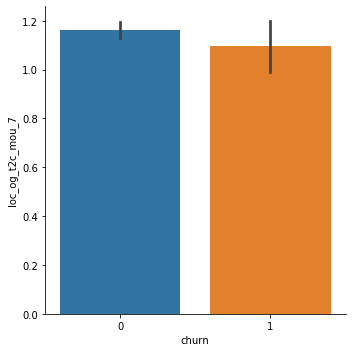

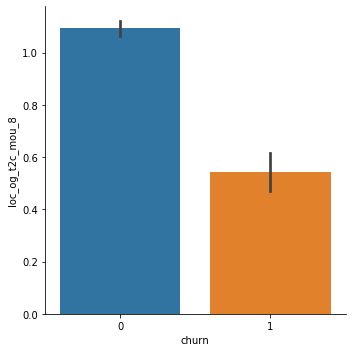

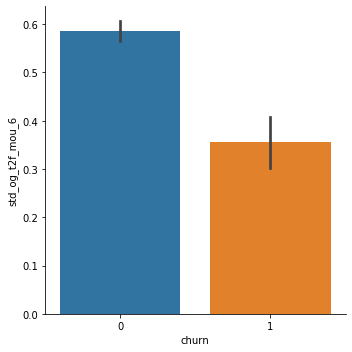

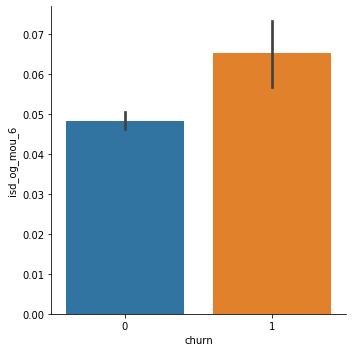

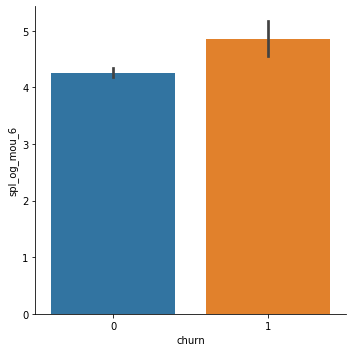

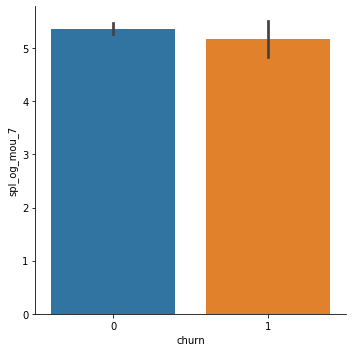

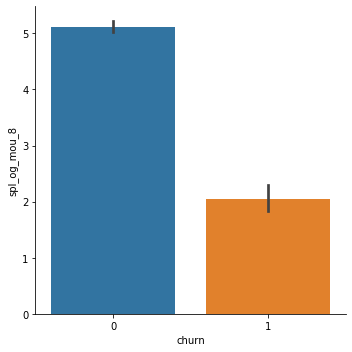

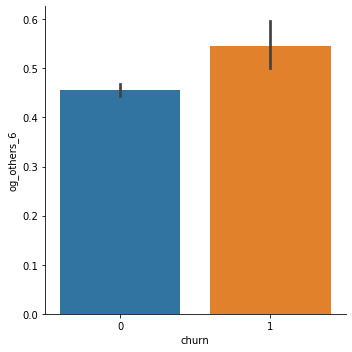

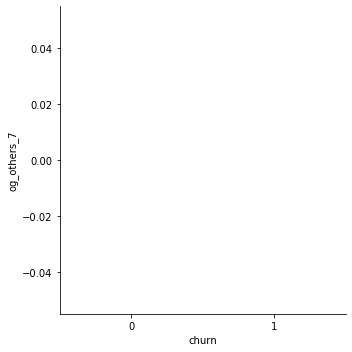

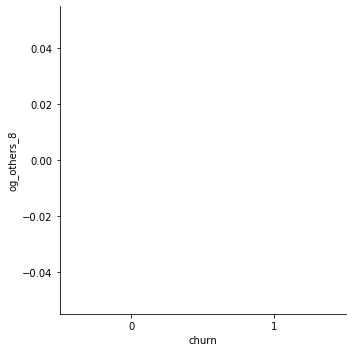

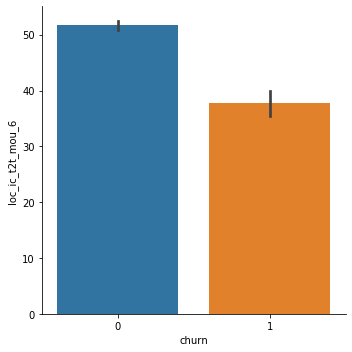

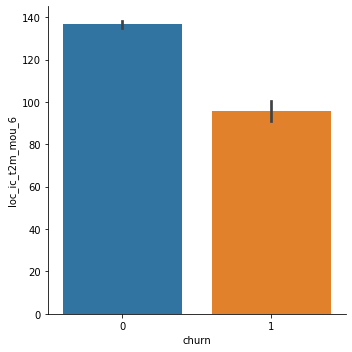

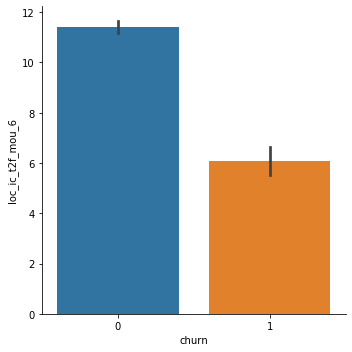

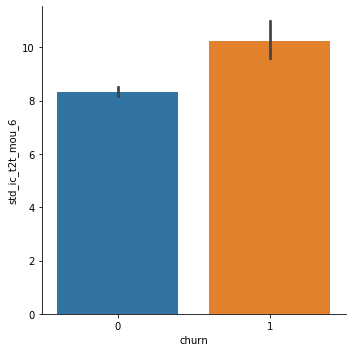

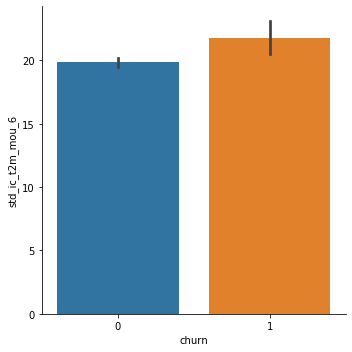

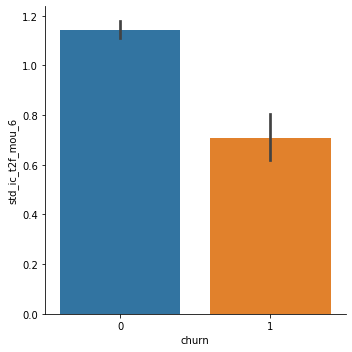

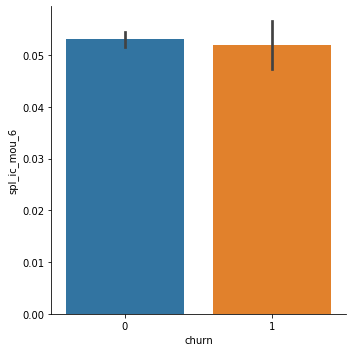

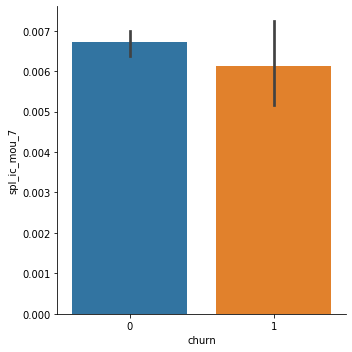

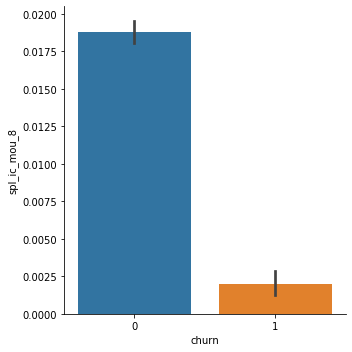

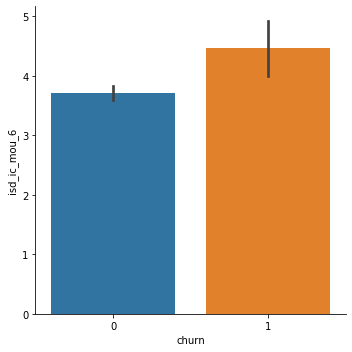

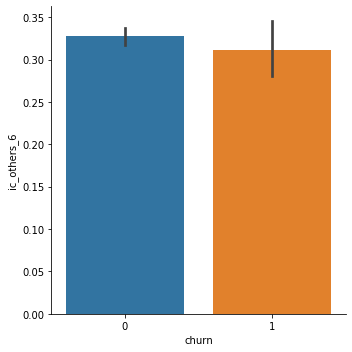

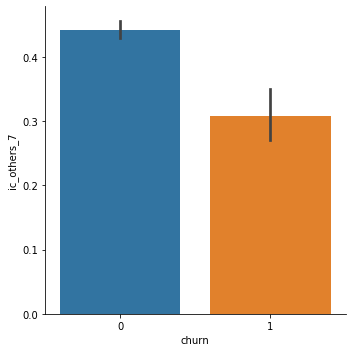

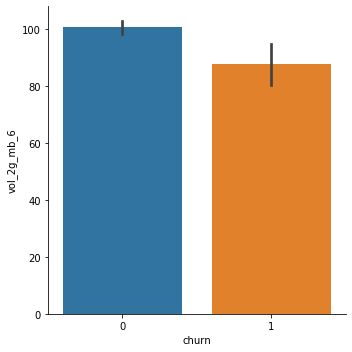

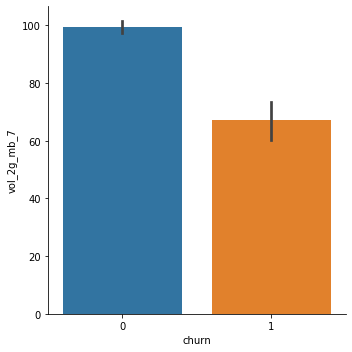

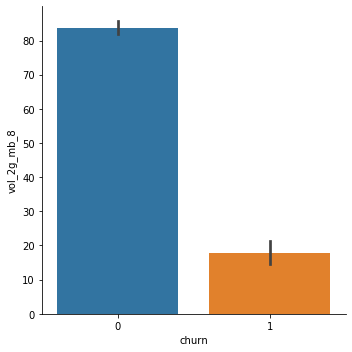

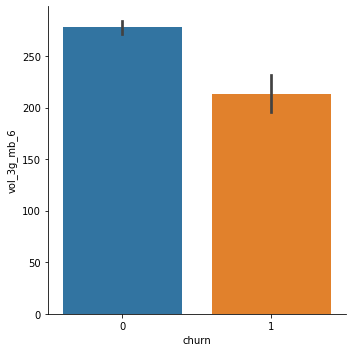

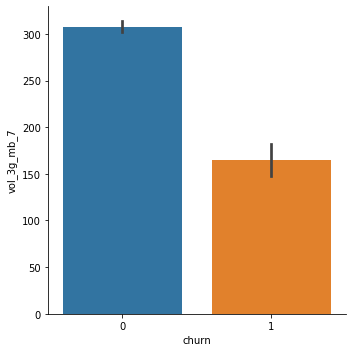

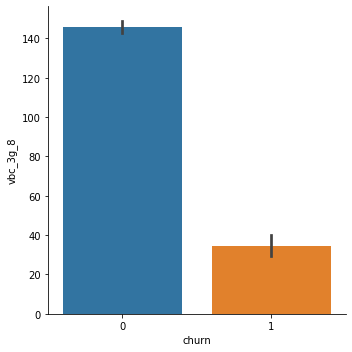

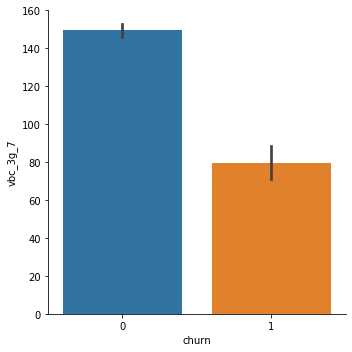

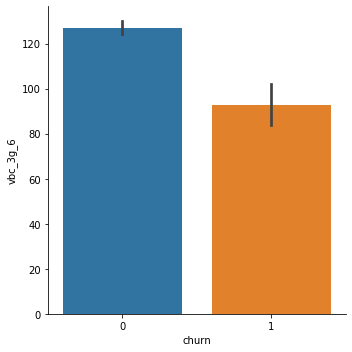

In [128]:
for column in ['total_rech_num_6', 'total_rech_num_7',
        'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
        'last_day_rch_amt_6', 'last_day_rch_amt_7', 'monthly_2g_6',
        'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7',
        'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6',
        'sachet_3g_7', 'sachet_3g_8', 'aon','arpu_6', 'arpu_7', 'onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6',
        'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7',
        'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6',
        'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7',
        'loc_og_t2c_mou_8', 'std_og_t2f_mou_6', 'isd_og_mou_6', 'spl_og_mou_6',
        'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7',
        'og_others_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6',
        'loc_ic_t2f_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6',
        'std_ic_t2f_mou_6', 'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8',
        'isd_ic_mou_6', 'ic_others_6', 'ic_others_7', 'vol_2g_mb_6',
        'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7', 'vbc_3g_8',
        'vbc_3g_7', 'vbc_3g_6']:
        sns.catplot(x="churn", y=column, kind="bar", data=high_value_cust);

We found that for og_others_8 and og_others_7, there is no dependency on churn. Hence checking more for these column to see if they can be dropped.

In [129]:
high_value_cust['og_others_8'].describe()

count    30001.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: og_others_8, dtype: float64

In [130]:
high_value_cust['og_others_7'].describe()

count    30001.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: og_others_7, dtype: float64

Hence , above 2 columns can also be dropped.

In [131]:
high_value_cust.drop(high_value_cust[['og_others_7','og_others_8']], axis=1, inplace=True)

#### Segregating the columns keeping by Good phase column together

In [132]:
columns67 = high_value_cust.filter(regex='_6|_7').columns.str[:-2]
columns67




Index(['arpu', 'arpu', 'onnet_mou', 'offnet_mou', 'roam_ic_mou', 'roam_ic_mou',
       'roam_og_mou', 'roam_og_mou', 'loc_og_t2t_mou', 'loc_og_t2m_mou',
       'loc_og_t2f_mou', 'loc_og_t2c_mou', 'loc_og_t2c_mou', 'std_og_t2f_mou',
       'isd_og_mou', 'spl_og_mou', 'spl_og_mou', 'og_others', 'loc_ic_t2t_mou',
       'loc_ic_t2m_mou', 'loc_ic_t2f_mou', 'std_ic_t2t_mou', 'std_ic_t2m_mou',
       'std_ic_t2f_mou', 'spl_ic_mou', 'spl_ic_mou', 'isd_ic_mou', 'ic_others',
       'ic_others', 'total_rech_num', 'total_rech_num', 'max_rech_amt',
       'max_rech_amt', 'date_of_last_rech', 'date_of_last_rech',
       'last_day_rch_amt', 'last_day_rch_amt', 'vol_2g_mb', 'vol_2g_mb',
       'vol_3g_mb', 'vol_3g_mb', 'monthly_2g', 'monthly_2g', 'sachet_2g',
       'sachet_2g', 'monthly_3g', 'monthly_3g', 'sachet_3g', 'sachet_3g',
       'vbc_3g', 'vbc_3g'],
      dtype='object')

In [133]:
columns67.unique()

Index(['arpu', 'onnet_mou', 'offnet_mou', 'roam_ic_mou', 'roam_og_mou',
       'loc_og_t2t_mou', 'loc_og_t2m_mou', 'loc_og_t2f_mou', 'loc_og_t2c_mou',
       'std_og_t2f_mou', 'isd_og_mou', 'spl_og_mou', 'og_others',
       'loc_ic_t2t_mou', 'loc_ic_t2m_mou', 'loc_ic_t2f_mou', 'std_ic_t2t_mou',
       'std_ic_t2m_mou', 'std_ic_t2f_mou', 'spl_ic_mou', 'isd_ic_mou',
       'ic_others', 'total_rech_num', 'max_rech_amt', 'date_of_last_rech',
       'last_day_rch_amt', 'vol_2g_mb', 'vol_3g_mb', 'monthly_2g', 'sachet_2g',
       'monthly_3g', 'sachet_3g', 'vbc_3g'],
      dtype='object')

In [134]:
object_col_data = high_value_cust.select_dtypes(include=['object'])
object_col_data

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8
0,2014-06-21 00:00:00,2014-07-16 00:00:00,2014-08-08 00:00:00
7,2014-06-27 00:00:00,2014-07-25 00:00:00,2014-08-26 00:00:00
8,2014-06-25 00:00:00,2014-07-31 00:00:00,2014-08-30 00:00:00
21,2014-06-30 00:00:00,2014-07-31 00:00:00,2014-08-31 00:00:00
23,2014-06-18 00:00:00,2014-07-07 00:00:00,2014-08-24 00:00:00
33,2014-06-30 00:00:00,2014-07-30 00:00:00,2014-08-26 00:00:00
38,2014-06-30 00:00:00,2014-07-28 00:00:00,2014-08-24 00:00:00
41,2014-06-24 00:00:00,2014-07-22 00:00:00,2014-08-31 00:00:00
48,2014-06-29 00:00:00,2014-07-23 00:00:00,2014-08-28 00:00:00
53,2014-06-29 00:00:00,2014-07-31 00:00:00,2014-08-26 00:00:00


In [135]:
for idx, col in enumerate(columns67 .unique()):
    avg_columns67 = "average_"+col+"_col67"
    avg_columns6 = "average_"+col+"_col6"
    avg_columns7 = "average_"+col+"_col7"
    col_6 = col+"_6"
    col_7 = col+"_7"
    if(col == 'date_of_last_rech'):
        high_value_cust[avg_columns6] = high_value_cust[col_6]
        high_value_cust[avg_columns7] = high_value_cust[col_7]     
    if col_6 in high_value_cust.columns and col_7 in high_value_cust.columns and col != 'date_of_last_rech':
        high_value_cust[avg_columns67] = (high_value_cust[col_6]  + high_value_cust[col_7])/ 2
    if col_6 in high_value_cust.columns and col_7 not in high_value_cust.columns:
        high_value_cust[avg_columns6] = high_value_cust[col_6]
    if col_6 not in high_value_cust.columns and col_7 in high_value_cust.columns:
        high_value_cust[avg_columns7] = high_value_cust[col_7]

In [136]:
print (high_value_cust.shape)
high_value_cust.head(5)

(30001, 100)


,mobile_number,arpu_6,arpu_7,onnet_mou_6,offnet_mou_6,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2f_mou_6,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2f_mou_6,std_ic_t2t_mou_6,std_ic_t2m_mou_6,std_ic_t2f_mou_6,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,ic_others_6,ic_others_7,total_rech_num_6,total_rech_num_7,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn,average_arpu_col67,average_onnet_mou_col6,average_offnet_mou_col6,average_roam_ic_mou_col67,average_roam_og_mou_col67,average_loc_og_t2t_mou_col6,average_loc_og_t2m_mou_col6,average_loc_og_t2f_mou_col6,average_loc_og_t2c_mou_col67,average_std_og_t2f_mou_col6,average_isd_og_mou_col6,average_spl_og_mou_col67,average_og_others_col6,average_loc_ic_t2t_mou_col6,average_loc_ic_t2m_mou_col6,average_loc_ic_t2f_mou_col6,average_std_ic_t2t_mou_col6,average_std_ic_t2m_mou_col6,average_std_ic_t2f_mou_col6,average_spl_ic_mou_col67,average_isd_ic_mou_col6,average_ic_others_col67,average_total_rech_num_col67,average_max_rech_amt_col67,average_date_of_last_rech_col6,average_date_of_last_rech_col7,average_last_day_rch_amt_col67,average_vol_2g_mb_col67,average_vol_3g_mb_col67,average_monthly_2g_col67,average_sachet_2g_col67,average_monthly_3g_col67,average_sachet_3g_col67,average_vbc_3g_col67
0,7000842753,197.385,214.816,0.00,0.21,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,4,3,252,252,252,2014-06-21 00:00:00,2014-07-16 00:00:00,2014-08-08 00:00:00,252,252,30.13,1.32,5.75,83.57,150.76,0,0,0,0,0,1,1,1,0,0,0,968,30.40,0.00,101.20,1,206.1005,0.00,0.21,0.00,0.000,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.00,0.000,3.5,252.0,2014-06-21 00:00:00,2014-07-16 00:00:00,252.0,15.725,117.165,0.0,0.0,1.0,0.0,50.600
7,7000701601,1069.180,1261.272,57.84,453.43,16.23,33.49,31.64,23.74,12.59,38.06,51.39,308.63,30.43,0.0,0.0,0.00,6.66,0.0,4.5,0.0,6.50,0.0,58.14,217.56,71.56,36.89,91.44,11.18,0.21,0.0,0.0,2.06,3.41,4.59,5,5,459,459,440,2014-06-27 00:00:00,2014-07-25 00:00:00,2014-08-26 00:00:00,0,0,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,1,1165.2260,57.84,453.43,24.86,18.165,51.39,308.63,30.43,0.0,6.66,0.0,2.25,0.0,58.14,217.56,71.56,36.89,91.44,11.18,0.105,2.06,4.000,5.0,459.0,2014-06-27 00:00:00,2014-07-25 00:00:00,0.0,0.000,0.000,0.0,0.0,0.0,0.0,19.060
8,7001524846,378.721,492.223,413.69,94.66,0.00,0.00,0.00,0.00,0.00,0.00,297.13,80.96,0.00,0.0,0.0,7.15,0.00,0.0,0.0,0.0,10.23,0.0,23.84,57.58,0.00,0.00,22.43,0.00,0.00,0.0,0.0,0.00,0.00,0.00,19,21,90,154,30,2014-06-25 00:00:00,2014-07-31 00:00:00,2014-08-30 00:00:00,50,0,0.00,356.00,0.03,0.00,750.95,0,1,0,0,1,0,0,0,0,0,0,315,21.03,910.65,122.16,0,435.4720,413.69,94.66,0.00,0.000,297.13,80.96,0.00,0.0,0.00,0.0,0.00,0.0,23.84,57.58,0.00,0.00,22.43,0.00,0.000,0.00,0.000,20.0,122.0,2014-06-25 00:00:00,2014-07-31 00:00:00,25.0,178.000,375.475,0.5,0.5,0.0,0.0,516.405
21,7002124215,514.453,597.753,102.41,757.93,0.00,0.00,0.00,0.00,0.00,0.00,4.48,91.81,0.75,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,2.48,118.23,4.61,14.06,67.69,0.00,0.00,0.0,0.0,0.00,0.00,0.00,22,26,50,50,50,2014-06-30 00:00:00,2014-07-31 00:00:00,2014-08-31 00:00:00,30,20,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,720,0.00,0.00,0.00,0,556.1030,102.41,757.93,0.00,0.000,4.48,91.81,0.75,0.0,0.00,0.0,0.00,0.0,2.48,118.23,4.61,14.06,67.69,0.00,0.000,0.00,0.000,24.0,50.0,2014-06-30 00:00:00,2014-07-31 00:00:0

In [137]:

col_list = high_value_cust.filter(regex='_6|_7').columns
col_list
#high_value_cust.drop(col_list, axis=1, inplace=True)
#high_value_cust.head()

Index(['arpu_6', 'arpu_7', 'onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6',
       'roam_ic_mou_7', 'roam_og_mou_6', 'roam_og_mou_7', 'loc_og_t2t_mou_6',
       'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'std_og_t2f_mou_6', 'isd_og_mou_6', 'spl_og_mou_6',
       'spl_og_mou_7', 'og_others_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6',
       'loc_ic_t2f_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6',
       'std_ic_t2f_mou_6', 'spl_ic_mou_6', 'spl_ic_mou_7', 'isd_ic_mou_6',
       'ic_others_6', 'ic_others_7', 'total_rech_num_6', 'total_rech_num_7',
       'max_rech_amt_6', 'max_rech_amt_7', 'date_of_last_rech_6',
       'date_of_last_rech_7', 'last_day_rch_amt_6', 'last_day_rch_amt_7',
       'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_3g_mb_6', 'vol_3g_mb_7',
       'monthly_2g_6', 'monthly_2g_7', 'sachet_2g_6', 'sachet_2g_7',
       'monthly_3g_6', 'monthly_3g_7', 'sachet_3g_6', 'sachet_3g_7',
       'vbc_3g_7', 'vbc_3g_6'],
      dtype='object')

In [138]:
high_value_cust.shape

(30001, 100)

In [139]:
col_list.shape

(51,)

In [140]:
col_list_8 = high_value_cust.filter(regex='_8').columns
col_list_8

Index(['roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_t2c_mou_8', 'spl_og_mou_8',
       'spl_ic_mou_8', 'max_rech_amt_8', 'date_of_last_rech_8', 'vol_2g_mb_8',
       'monthly_2g_8', 'monthly_3g_8', 'sachet_3g_8', 'vbc_3g_8'],
      dtype='object')

In [141]:
high_value_cust_bk2=high_value_cust
high_value_cust.drop(col_list, axis=1, inplace=True)
high_value_cust.head()

,mobile_number,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,spl_og_mou_8,spl_ic_mou_8,max_rech_amt_8,date_of_last_rech_8,vol_2g_mb_8,monthly_2g_8,monthly_3g_8,sachet_3g_8,aon,vbc_3g_8,churn,average_arpu_col67,average_onnet_mou_col6,average_offnet_mou_col6,average_roam_ic_mou_col67,average_roam_og_mou_col67,average_loc_og_t2t_mou_col6,average_loc_og_t2m_mou_col6,average_loc_og_t2f_mou_col6,average_loc_og_t2c_mou_col67,average_std_og_t2f_mou_col6,average_isd_og_mou_col6,average_spl_og_mou_col67,average_og_others_col6,average_loc_ic_t2t_mou_col6,average_loc_ic_t2m_mou_col6,average_loc_ic_t2f_mou_col6,average_std_ic_t2t_mou_col6,average_std_ic_t2m_mou_col6,average_std_ic_t2f_mou_col6,average_spl_ic_mou_col67,average_isd_ic_mou_col6,average_ic_others_col67,average_total_rech_num_col67,average_max_rech_amt_col67,average_date_of_last_rech_col6,average_date_of_last_rech_col7,average_last_day_rch_amt_col67,average_vol_2g_mb_col67,average_vol_3g_mb_col67,average_monthly_2g_col67,average_sachet_2g_col67,average_monthly_3g_col67,average_sachet_3g_col67,average_vbc_3g_col67
0,7000842753,0.00,0.00,0.00,0.00,0.0,252,2014-08-08 00:00:00,5.75,0,1,0,968,30.40,1,206.1005,0.00,0.21,0.00,0.000,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.00,0.000,3.5,252.0,2014-06-21 00:00:00,2014-07-16 00:00:00,252.0,15.725,117.165,0.0,0.0,1.0,0.0,50.600
7,7000701601,31.64,38.06,0.00,6.50,0.0,440,2014-08-26 00:00:00,0.00,0,0,0,802,57.74,1,1165.2260,57.84,453.43,24.86,18.165,51.39,308.63,30.43,0.0,6.66,0.0,2.25,0.0,58.14,217.56,71.56,36.89,91.44,11.18,0.105,2.06,4.000,5.0,459.0,2014-06-27 00:00:00,2014-07-25 00:00:00,0.0,0.000,0.000,0.0,0.0,0.0,0.0,19.060
8,7001524846,0.00,0.00,7.15,10.23,0.0,30,2014-08-30 00:00:00,0.03,0,0,0,315,21.03,0,435.4720,413.69,94.66,0.00,0.000,297.13,80.96,0.00,0.0,0.00,0.0,0.00,0.0,23.84,57.58,0.00,0.00,22.43,0.00,0.000,0.00,0.000,20.0,122.0,2014-06-25 00:00:00,2014-07-31 00:00:00,25.0,178.000,375.475,0.5,0.5,0.0,0.0,516.405
21,7002124215,0.00,0.00,0.00,0.00,0.0,50,2014-08-31 00:00:00,0.00,0,0,0,720,0.00,0,556.1030,102.41,757.93,0.00,0.000,4.48,91.81,0.75,0.0,0.00,0.0,0.00,0.0,2.48,118.23,4.61,14.06,67.69,0.00,0.000,0.00,0.000,24.0,50.0,2014-06-30 00:00:00,2014-07-31 00:00:00,25.0,0.000,0.000,0.0,0.0,0.0,0.0,0.000
23,7000887461,0.00,0.00,9.38,17.71,0.0,179,2014-08-24 00:00:00,0.01,0,1,1,604,40.45,0,153.2035,48.96,85.41,0.00,0.000,48.96,82.94,0.00,0.0,0.00,0.0,0.05,0.0,20.71,95.91,0.00,0.51,2.43,0.00,0.000,0.00,2.295,4.0,102.0,2014-06-18 00:00:00,2014-07-07 00:00:00,89.5,0.240,299.545,0.0,0.0,0.5,0.0,25.930


In [142]:
high_value_cust.shape
high_value_cust_2=high_value_cust

#### Data Preparation is completed.

### Data Modeling along with Data Evaluation

We will now proceed with Model building using multiple techniques and evaluate them.

In [143]:
high_value_cust_2.head(5)

,mobile_number,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,spl_og_mou_8,spl_ic_mou_8,max_rech_amt_8,date_of_last_rech_8,vol_2g_mb_8,monthly_2g_8,monthly_3g_8,sachet_3g_8,aon,vbc_3g_8,churn,average_arpu_col67,average_onnet_mou_col6,average_offnet_mou_col6,average_roam_ic_mou_col67,average_roam_og_mou_col67,average_loc_og_t2t_mou_col6,average_loc_og_t2m_mou_col6,average_loc_og_t2f_mou_col6,average_loc_og_t2c_mou_col67,average_std_og_t2f_mou_col6,average_isd_og_mou_col6,average_spl_og_mou_col67,average_og_others_col6,average_loc_ic_t2t_mou_col6,average_loc_ic_t2m_mou_col6,average_loc_ic_t2f_mou_col6,average_std_ic_t2t_mou_col6,average_std_ic_t2m_mou_col6,average_std_ic_t2f_mou_col6,average_spl_ic_mou_col67,average_isd_ic_mou_col6,average_ic_others_col67,average_total_rech_num_col67,average_max_rech_amt_col67,average_date_of_last_rech_col6,average_date_of_last_rech_col7,average_last_day_rch_amt_col67,average_vol_2g_mb_col67,average_vol_3g_mb_col67,average_monthly_2g_col67,average_sachet_2g_col67,average_monthly_3g_col67,average_sachet_3g_col67,average_vbc_3g_col67
0,7000842753,0.00,0.00,0.00,0.00,0.0,252,2014-08-08 00:00:00,5.75,0,1,0,968,30.40,1,206.1005,0.00,0.21,0.00,0.000,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.00,0.000,3.5,252.0,2014-06-21 00:00:00,2014-07-16 00:00:00,252.0,15.725,117.165,0.0,0.0,1.0,0.0,50.600
7,7000701601,31.64,38.06,0.00,6.50,0.0,440,2014-08-26 00:00:00,0.00,0,0,0,802,57.74,1,1165.2260,57.84,453.43,24.86,18.165,51.39,308.63,30.43,0.0,6.66,0.0,2.25,0.0,58.14,217.56,71.56,36.89,91.44,11.18,0.105,2.06,4.000,5.0,459.0,2014-06-27 00:00:00,2014-07-25 00:00:00,0.0,0.000,0.000,0.0,0.0,0.0,0.0,19.060
8,7001524846,0.00,0.00,7.15,10.23,0.0,30,2014-08-30 00:00:00,0.03,0,0,0,315,21.03,0,435.4720,413.69,94.66,0.00,0.000,297.13,80.96,0.00,0.0,0.00,0.0,0.00,0.0,23.84,57.58,0.00,0.00,22.43,0.00,0.000,0.00,0.000,20.0,122.0,2014-06-25 00:00:00,2014-07-31 00:00:00,25.0,178.000,375.475,0.5,0.5,0.0,0.0,516.405
21,7002124215,0.00,0.00,0.00,0.00,0.0,50,2014-08-31 00:00:00,0.00,0,0,0,720,0.00,0,556.1030,102.41,757.93,0.00,0.000,4.48,91.81,0.75,0.0,0.00,0.0,0.00,0.0,2.48,118.23,4.61,14.06,67.69,0.00,0.000,0.00,0.000,24.0,50.0,2014-06-30 00:00:00,2014-07-31 00:00:00,25.0,0.000,0.000,0.0,0.0,0.0,0.0,0.000
23,7000887461,0.00,0.00,9.38,17.71,0.0,179,2014-08-24 00:00:00,0.01,0,1,1,604,40.45,0,153.2035,48.96,85.41,0.00,0.000,48.96,82.94,0.00,0.0,0.00,0.0,0.05,0.0,20.71,95.91,0.00,0.51,2.43,0.00,0.000,0.00,2.295,4.0,102.0,2014-06-18 00:00:00,2014-07-07 00:00:00,89.5,0.240,299.545,0.0,0.0,0.5,0.0,25.930


In [144]:
columns = ['date_of_last_rech_8','average_date_of_last_rech_col6','average_date_of_last_rech_col7']
ndf = high_value_cust_2.drop(columns, 1)

In [145]:
ndf.head()

,mobile_number,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,spl_og_mou_8,spl_ic_mou_8,max_rech_amt_8,vol_2g_mb_8,monthly_2g_8,monthly_3g_8,sachet_3g_8,aon,vbc_3g_8,churn,average_arpu_col67,average_onnet_mou_col6,average_offnet_mou_col6,average_roam_ic_mou_col67,average_roam_og_mou_col67,average_loc_og_t2t_mou_col6,average_loc_og_t2m_mou_col6,average_loc_og_t2f_mou_col6,average_loc_og_t2c_mou_col67,average_std_og_t2f_mou_col6,average_isd_og_mou_col6,average_spl_og_mou_col67,average_og_others_col6,average_loc_ic_t2t_mou_col6,average_loc_ic_t2m_mou_col6,average_loc_ic_t2f_mou_col6,average_std_ic_t2t_mou_col6,average_std_ic_t2m_mou_col6,average_std_ic_t2f_mou_col6,average_spl_ic_mou_col67,average_isd_ic_mou_col6,average_ic_others_col67,average_total_rech_num_col67,average_max_rech_amt_col67,average_last_day_rch_amt_col67,average_vol_2g_mb_col67,average_vol_3g_mb_col67,average_monthly_2g_col67,average_sachet_2g_col67,average_monthly_3g_col67,average_sachet_3g_col67,average_vbc_3g_col67
0,7000842753,0.00,0.00,0.00,0.00,0.0,252,5.75,0,1,0,968,30.40,1,206.1005,0.00,0.21,0.00,0.000,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.00,0.000,3.5,252.0,252.0,15.725,117.165,0.0,0.0,1.0,0.0,50.600
7,7000701601,31.64,38.06,0.00,6.50,0.0,440,0.00,0,0,0,802,57.74,1,1165.2260,57.84,453.43,24.86,18.165,51.39,308.63,30.43,0.0,6.66,0.0,2.25,0.0,58.14,217.56,71.56,36.89,91.44,11.18,0.105,2.06,4.000,5.0,459.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,19.060
8,7001524846,0.00,0.00,7.15,10.23,0.0,30,0.03,0,0,0,315,21.03,0,435.4720,413.69,94.66,0.00,0.000,297.13,80.96,0.00,0.0,0.00,0.0,0.00,0.0,23.84,57.58,0.00,0.00,22.43,0.00,0.000,0.00,0.000,20.0,122.0,25.0,178.000,375.475,0.5,0.5,0.0,0.0,516.405
21,7002124215,0.00,0.00,0.00,0.00,0.0,50,0.00,0,0,0,720,0.00,0,556.1030,102.41,757.93,0.00,0.000,4.48,91.81,0.75,0.0,0.00,0.0,0.00,0.0,2.48,118.23,4.61,14.06,67.69,0.00,0.000,0.00,0.000,24.0,50.0,25.0,0.000,0.000,0.0,0.0,0.0,0.0,0.000
23,7000887461,0.00,0.00,9.38,17.71,0.0,179,0.01,0,1,1,604,40.45,0,153.2035,48.96,85.41,0.00,0.000,48.96,82.94,0.00,0.0,0.00,0.0,0.05,0.0,20.71,95.91,0.00,0.51,2.43,0.00,0.000,0.00,2.295,4.0,102.0,89.5,0.240,299.545,0.0,0.0,0.5,0.0,25.930


In [146]:
# We will create a copy of our dataframe for Model Building

df = ndf[:].copy()

#Though null values were already handled, during it for final time.

df.fillna(0, inplace=True)
df.head()

,mobile_number,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,spl_og_mou_8,spl_ic_mou_8,max_rech_amt_8,vol_2g_mb_8,monthly_2g_8,monthly_3g_8,sachet_3g_8,aon,vbc_3g_8,churn,average_arpu_col67,average_onnet_mou_col6,average_offnet_mou_col6,average_roam_ic_mou_col67,average_roam_og_mou_col67,average_loc_og_t2t_mou_col6,average_loc_og_t2m_mou_col6,average_loc_og_t2f_mou_col6,average_loc_og_t2c_mou_col67,average_std_og_t2f_mou_col6,average_isd_og_mou_col6,average_spl_og_mou_col67,average_og_others_col6,average_loc_ic_t2t_mou_col6,average_loc_ic_t2m_mou_col6,average_loc_ic_t2f_mou_col6,average_std_ic_t2t_mou_col6,average_std_ic_t2m_mou_col6,average_std_ic_t2f_mou_col6,average_spl_ic_mou_col67,average_isd_ic_mou_col6,average_ic_others_col67,average_total_rech_num_col67,average_max_rech_amt_col67,average_last_day_rch_amt_col67,average_vol_2g_mb_col67,average_vol_3g_mb_col67,average_monthly_2g_col67,average_sachet_2g_col67,average_monthly_3g_col67,average_sachet_3g_col67,average_vbc_3g_col67
0,7000842753,0.00,0.00,0.00,0.00,0.0,252,5.75,0,1,0,968,30.40,1,206.1005,0.00,0.21,0.00,0.000,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.00,0.000,3.5,252.0,252.0,15.725,117.165,0.0,0.0,1.0,0.0,50.600
7,7000701601,31.64,38.06,0.00,6.50,0.0,440,0.00,0,0,0,802,57.74,1,1165.2260,57.84,453.43,24.86,18.165,51.39,308.63,30.43,0.0,6.66,0.0,2.25,0.0,58.14,217.56,71.56,36.89,91.44,11.18,0.105,2.06,4.000,5.0,459.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,19.060
8,7001524846,0.00,0.00,7.15,10.23,0.0,30,0.03,0,0,0,315,21.03,0,435.4720,413.69,94.66,0.00,0.000,297.13,80.96,0.00,0.0,0.00,0.0,0.00,0.0,23.84,57.58,0.00,0.00,22.43,0.00,0.000,0.00,0.000,20.0,122.0,25.0,178.000,375.475,0.5,0.5,0.0,0.0,516.405
21,7002124215,0.00,0.00,0.00,0.00,0.0,50,0.00,0,0,0,720,0.00,0,556.1030,102.41,757.93,0.00,0.000,4.48,91.81,0.75,0.0,0.00,0.0,0.00,0.0,2.48,118.23,4.61,14.06,67.69,0.00,0.000,0.00,0.000,24.0,50.0,25.0,0.000,0.000,0.0,0.0,0.0,0.0,0.000
23,7000887461,0.00,0.00,9.38,17.71,0.0,179,0.01,0,1,1,604,40.45,0,153.2035,48.96,85.41,0.00,0.000,48.96,82.94,0.00,0.0,0.00,0.0,0.05,0.0,20.71,95.91,0.00,0.51,2.43,0.00,0.000,0.00,2.295,4.0,102.0,89.5,0.240,299.545,0.0,0.0,0.5,0.0,25.930


In [147]:
#Separating dependant variable with independant variables and then dropping it.

X = df.drop(['churn'], axis=1)
y = df['churn']

df.drop('churn', axis=1, inplace=True)

In [148]:
# scaling dataset using standard scalar

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

In [149]:
# Splitting dataset into test and train sets in 70:30 ratio
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)

In [150]:
#checking Imbalance in data
#As we have already calculated imbalance in our original dataset and now verifying in the splits dataset
print("X_train Shape : ", X_train.shape)
print("X_test Shape : ", X_test.shape)

y_train_imb = (y_train != 0).sum()/(y_train == 0).sum()
y_test_imb = (y_test != 0).sum()/(y_test == 0).sum()
print("Train data Imbalance: ", y_train_imb)
print("Test data Imbalance: ", y_test_imb)

X_train Shape :  (21000, 45)
X_test Shape :  (9001, 45)
Imbalance in Train Data :  0.08875985068436333
Imbalance in Test Data :  0.08812862669245648


# Building the Model

In [151]:
#Using SVC Logistic Regression Model
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

lr = LogisticRegression()

lr.svm = SVC(kernel='linear') 
lr.svm.fit(X_train,y_train)
preds = lr.svm.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.9170138310281619

In [152]:
# Feature reduction using RFE
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
from sklearn.feature_selection import RFE

# running RFE with 15 variables as output
rfe = RFE(lr, 15)   
rfe = rfe.fit(X_train, y_train)

In [153]:
rfe_features = list(df.columns[rfe.support_])
print("Features Identified by RFE Method ", rfe_features)

Features Identified by RFE Method  ['roam_og_mou_8', 'spl_og_mou_8', 'spl_ic_mou_8', 'max_rech_amt_8', 'vol_2g_mb_8', 'sachet_3g_8', 'aon', 'vbc_3g_8', 'average_arpu_col67', 'average_loc_og_t2m_mou_col6', 'average_total_rech_num_col67', 'average_last_day_rch_amt_col67', 'average_vol_2g_mb_col67', 'average_monthly_2g_col67', 'average_vbc_3g_col67']


In [154]:
X_rfe = pd.DataFrame(data=X_train).iloc[:, rfe.support_]
y_rfe = y_train

# Logistic Regression


In [155]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=1)
lr.fit(X_rfe, y_rfe)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [156]:
X_test_rfe = pd.DataFrame(data=X_test).iloc[:, rfe.support_]

y_pred = lr.predict(X_test_rfe)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

# Printing the confusion matrix with details of true positive, false positives, true negative and false negatives
print(confusion_matrix)

[[5475   28]
 [ 453   45]]


In [157]:
print('Accuracy of Logistic Regression Model on test set is ',lr.score(X_test_rfe, y_test))

Accuracy of Logistic Regression Model on test set is  0.9198466922179637


In [158]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

#Evaluating using the different metrics for logistics regression

              precision    recall  f1-score   support

           0       0.92      0.99      0.96      5503
           1       0.62      0.09      0.16       498

    accuracy                           0.92      6001
   macro avg       0.77      0.54      0.56      6001
weighted avg       0.90      0.92      0.89      6001



In [159]:
# To get the weights of all the variables
weights = pd.Series(lr.coef_[0],
                 index=rfe_features)
weights.sort_values(ascending = False)



average_arpu_col67                0.637889
roam_og_mou_8                     0.328477
average_vol_2g_mb_col67           0.276356
average_vbc_3g_col67              0.264652
sachet_3g_8                      -0.203506
average_last_day_rch_amt_col67   -0.219801
average_monthly_2g_col67         -0.256589
average_loc_og_t2m_mou_col6      -0.276891
aon                              -0.362425
average_total_rech_num_col67     -0.431066
spl_og_mou_8                     -0.432402
vbc_3g_8                         -0.563222
spl_ic_mou_8                     -0.639896
vol_2g_mb_8                      -0.701594
max_rech_amt_8                   -1.179305
dtype: float64

Confusion matix shows that the model has shortcomings in predicting churn as high false positives

# PCA Method

In [161]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(random_state=100)

#Doing the PCA on the train data
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
    svd_solver='auto', tol=0.0, whiten=False)

In [162]:
X_train_pca = pca.fit_transform(X_train)
print(X_train_pca.shape)

X_test_pca = pca.transform(X_test)
print(X_test_pca.shape)

(24000, 45)
(6001, 45)


In [163]:
#Applying logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lr_pca = LogisticRegression(C=1e9)
lr_pca.fit(X_train_pca, y_train)

# Predicted probabilities
y_pred = lr_pca.predict(X_test_pca)

# Converting y_pred to a dataframe from an array
y_pred_df = pd.DataFrame(y_pred)


In [164]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Printing confusion matrix
print(confusion_matrix(y_test,y_pred))

[[5464   39]
 [ 438   60]]


In [165]:
print("Accuracy of test set using Logistic Regression accuracy with PCA: ",accuracy_score(y_test,y_pred))

Logistic Regression accuracy with PCA:  0.9205132477920347


In [166]:
col = list(df.columns)
df_pca = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2],'Feature':col})
df_pca.head(10)

,PC1,PC2,PC3,Feature
0,0.071143,0.026996,-0.023188,mobile_number
1,0.096525,0.081522,0.354802,roam_ic_mou_8
2,0.081503,0.096471,0.361998,roam_og_mou_8
3,-0.026469,0.060376,-0.101644,loc_og_t2c_mou_8
4,-0.043921,0.108761,-0.159112,spl_og_mou_8
5,-0.067722,0.031057,-0.024799,spl_ic_mou_8
6,0.299562,-0.096730,0.032098,max_rech_amt_8
7,-0.070253,-0.146100,-0.092993,vol_2g_mb_8
8,0.046613,-0.155815,-0.080863,monthly_2g_8
9,0.178765,-0.215965,0.017574,monthly_3g_8


In [167]:
pca_32 = PCA(n_components=32)

df_tr_pca_32 = pca_32.fit_transform(X_train)
print(df_tr_pca_32.shape)

df_test_pca_32 = pca_32.transform(X_test)
print(df_test_pca_32.shape)

(24000, 32)
(6001, 32)


In [168]:
#Run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lr_pca1 = LogisticRegression(C=1e9)
lr_pca1.fit(df_tr_pca_32, y_train)

# Predicted probabilities
y_pred32 = lr_pca1.predict(df_test_pca_32)

# Converting y_pred to a dataframe from an array
df_y_pred = pd.DataFrame(y_pred32)



In [169]:
print("Accuracy of test set using Logistic Regression with PCA: ",accuracy_score(y_test,y_pred32))

Logistic Regression accuracy with PCA:  0.9181803032827862


In [170]:
#Main Features::roam_ic_mou_8,max_rech_amt_8,monthly_3g_8,monthly_2g_8,roam_og_mou_8 

# Feature reduction using LASSO


In [171]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
 
lsvc = LinearSVC(C=0.001, penalty="l1", dual=False).fit(X_train, y_train)
model = SelectFromModel(lsvc, prefit=True)
X_lasso = model.transform(X_train)
pos = model.get_support(indices=True)
# Feature reduction using RFE
print(X_lasso.shape)
print(pos)

(24000, 14)
[ 2  4  5  6  7 10 11 12 13 17 19 27 36 41]


In [172]:
#feature vector for decision tree
lasso_features = list(df.columns[pos])
print("Features for LASSO modeling: ", lasso_features)

Features for LASSO modeling:  ['roam_og_mou_8', 'spl_og_mou_8', 'spl_ic_mou_8', 'max_rech_amt_8', 'vol_2g_mb_8', 'sachet_3g_8', 'aon', 'vbc_3g_8', 'average_arpu_col67', 'average_roam_og_mou_col67', 'average_loc_og_t2m_mou_col6', 'average_loc_ic_t2m_mou_col6', 'average_max_rech_amt_col67', 'average_sachet_2g_col67']


Decision Tree 

In [173]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Fitting the decision tree with default hyperparameters, apart from
# max_depth =5 and later tuning them
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_lasso, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [176]:
# Evaluating default model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
X_test = pd.DataFrame(data=X_test)
#X_test = pd.DataFrame(data=X_test).iloc[:, pos]
y_pred1 = dt.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      5503
           1       0.66      0.37      0.47       498

    accuracy                           0.93      6001
   macro avg       0.80      0.68      0.72      6001
weighted avg       0.92      0.93      0.92      6001



In [177]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred1))
print('Accuracy of test set using Decision Tree :',accuracy_score(y_test,y_pred1))

[[5408   95]
 [ 314  184]]
Accuracy of Decision Tree : 0.9318446925512415


### Hyperparameter Tuning

In [194]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on max depth
parameters = {'max_depth': range(1, 40)}

# instantiate the model using gini index
dt = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dt, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score=True)
tree.fit(X_lasso, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None, param_grid={'max_depth': range(1, 40)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='

In [195]:
# scores of GridSearch CV
score = tree.cv_results_
pd.DataFrame(score).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.038956,0.002056,0.000605,0.000809,1,{'max_depth': 1},0.918975,0.918975,0.918958,0.919150,0.919150,0.919042,0.000089,11,0.919058,0.919058,0.919063,0.919015,0.919015,0.919042,0.000022
1,0.066905,0.003707,0.000405,0.000811,2,{'max_depth': 2},0.925849,0.925432,0.921667,0.929569,0.925401,0.925583,0.002504,9,0.927027,0.927132,0.927656,0.925004,0.927035,0.926771,0.000913
2,0.102617,0.009779,0.002432,0.002974,3,{'max_depth': 3},0.931473,0.931056,0.928542,0.936445,0.931861,0.931875,0.002562,5,0.932861,0.932913,0.933490,0.930524,0.932712,0.932500,0.001023
3,0.122924,0.005106,0.002012,0.003111,4,{'max_depth': 4},0.932931,0.932514,0.930000,0.936862,0.931027,0.932667,0.002345,3,0.934319,0.934319,0.935573,0.932972,0.934639,0.934365,0.000834
4,0.142712,0.003202,0.002021,0.003127,5,{'max_depth': 5},0.933347,0.934597,0.930000,0.939987,0.932486,0.934083,0.003313,1,0.937705,0.937236,0.936875,0.935524,0.937555,0.936979,0.000781


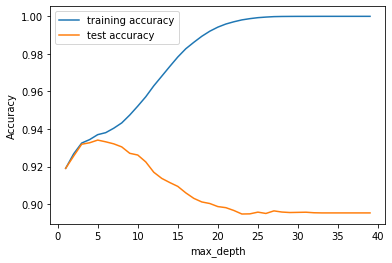

In [196]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(score["param_max_depth"], 
         score["mean_train_score"],
         label="training accuracy")
plt.plot(score["param_max_depth"], 
         score["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [197]:
# Will take max depth as 5
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on min sample leafs
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model using gini index
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score=True)
tree.fit(X_lasso, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=Tru

In [198]:
score = tree.cv_results_
pd.DataFrame(score).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.350782,0.010570,0.002204,0.003134,5,{'min_samples_leaf': 5},0.914393,0.915226,0.914167,0.914357,0.912482,0.914125,0.000899,10,0.961404,0.959685,0.961406,0.960054,0.960992,0.960708,0.000711
1,0.306684,0.013564,0.002013,0.004026,25,{'min_samples_leaf': 25},0.928140,0.931056,0.927083,0.933528,0.928318,0.929625,0.002352,9,0.942184,0.940257,0.940208,0.940055,0.941253,0.940792,0.000815
2,0.274387,0.008939,0.003612,0.002659,45,{'min_samples_leaf': 45},0.930431,0.933139,0.929167,0.932903,0.928735,0.930875,0.001840,6,0.939372,0.937497,0.937813,0.936878,0.937659,0.937844,0.000827
3,0.253993,0.014336,0.002827,0.003969,65,{'min_samples_leaf': 65},0.928973,0.933556,0.930833,0.934986,0.931861,0.932042,0.002092,5,0.937288,0.936559,0.936510,0.936305,0.936462,0.936625,0.000342
4,0.249108,0.006831,0.002418,0.003902,85,{'min_samples_leaf': 85},0.934180,0.933972,0.933125,0.935403,0.930819,0.933500,0.001525,3,0.936038,0.936038,0.935677,0.935576,0.936305,0.935927,0.000266


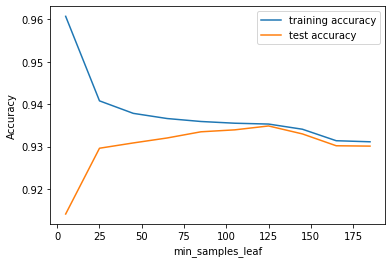

In [199]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(score["param_min_samples_leaf"], 
         score["mean_train_score"],
         label="training accuracy")
plt.plot(score["param_min_samples_leaf"], 
         score["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [200]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score=True)
tree.fit(X_lasso, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_split': range(5, 200, 20)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=Tr

In [201]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.376316,0.010177,0.004025,0.003355,5,{'min_samples_split': 5},0.903145,0.899813,0.893125,0.899979,0.900813,0.899375,0.003344,10,0.988854,0.988020,0.987865,0.988282,0.988438,0.988292,0.000344
1,0.372713,0.018453,0.001004,0.001267,25,{'min_samples_split': 25},0.919808,0.915643,0.911042,0.917274,0.911857,0.915125,0.003292,9,0.958800,0.958071,0.958385,0.958336,0.959950,0.958708,0.000663
2,0.340552,0.015298,0.004452,0.003924,45,{'min_samples_split': 45},0.925640,0.921058,0.917917,0.925401,0.916649,0.921333,0.003709,8,0.951195,0.949841,0.949896,0.951253,0.951513,0.950740,0.000719
3,0.292542,0.012468,0.003641,0.003697,65,{'min_samples_split': 65},0.928765,0.922724,0.922708,0.929985,0.921650,0.925167,0.003480,7,0.946716,0.946039,0.946562,0.946357,0.946461,0.946427,0.000227
4,0.310383,0.019962,0.000811,0.000993,85,{'min_samples_split': 85},0.928557,0.924807,0.924167,0.929985,0.924359,0.926375,0.002416,6,0.943643,0.944476,0.944792,0.943701,0.945003,0.944323,0.000558


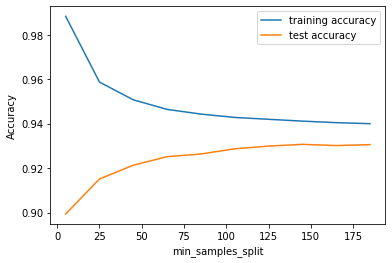

In [202]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [204]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(25, 175, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_lasso, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:   25.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                      

In [205]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results
# printing the optimal accuracy score and hyperparameters
print("Best Accuracy", grid_search.best_score_)

Best Accuracy 0.934875


In [206]:
print(grid_search.best_estimator_)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=125, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [208]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=25,
                                  min_samples_split=50)
clf_gini.fit(X_lasso, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=25, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [209]:
# accuracy score
print ('Accuracy Score for Decision Tree Final Model :',clf_gini.score(X_test,y_test))

Accuracy Score for Decision Tree Final Model : 0.932177970338277


### Random Forest

In [210]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

model_rf = RandomForestClassifier()
model_rf.fit(X_lasso, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print ('Randon Forest Accuracy with Default Hyperparameter',metrics.accuracy_score(y_test, prediction_test))

Randon Forest Accuracy with Default Hyperparameter 0.9283452757873688


In [211]:
print(classification_report(y_test,prediction_test))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      5503
           1       0.66      0.28      0.39       498

    accuracy                           0.93      6001
   macro avg       0.80      0.63      0.68      6001
weighted avg       0.92      0.93      0.91      6001



In [212]:
# Printing confusion matrix
print(confusion_matrix(y_test, prediction_test))

[[5432   71]
 [ 359  139]]


In [214]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                 return_train_score=True)
rf.fit(X_lasso, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [215]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.134205,0.005042,0.004848,0.003514,2,{'max_depth': 2},0.918975,0.918975,0.918958,0.919150,0.919150,0.919042,0.000089,4,0.919058,0.919058,0.919063,0.919015,0.919015,0.919042,0.000022
1,0.317639,0.061327,0.010729,0.001261,7,{'max_depth': 7},0.933972,0.929806,0.931875,0.930819,0.933528,0.932000,0.001578,2,0.938695,0.934163,0.937396,0.934639,0.937764,0.936531,0.001796
2,0.433508,0.037171,0.011651,0.001465,12,{'max_depth': 12},0.931889,0.936055,0.930833,0.937279,0.933319,0.933875,0.002443,1,0.961144,0.959269,0.960885,0.961721,0.959013,0.960406,0.001071
3,0.441679,0.014858,0.014474,0.005299,17,{'max_depth': 17},0.930639,0.932722,0.927708,0.933111,0.930819,0.931000,0.001919,3,0.986458,0.984791,0.984010,0.984792,0.984324,0.984875,0.000845


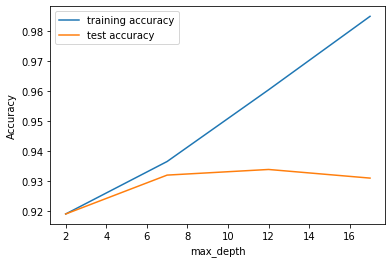

In [216]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [217]:
#Tuning min_samples_leaf
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(50, 400, 10)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                 return_train_score=True)
rf.fit(X_lasso, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

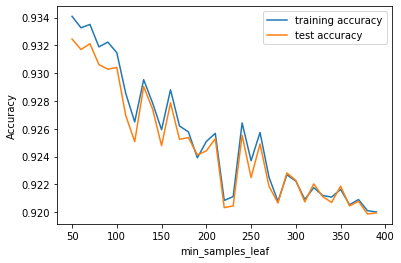

In [218]:
# scores of GridSearch CV
scores = rf.cv_results_

# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [219]:
#Tuning min_samples_split
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(100, 500, 25)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                 return_train_score=True)
rf.fit(X_lasso, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

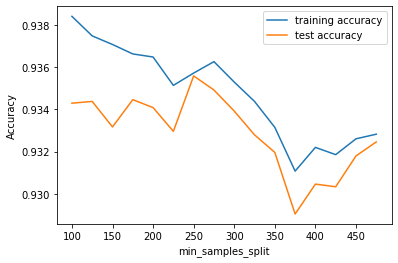

In [220]:
# scores of GridSearch CV
scores = rf.cv_results_

# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [221]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 300, 100),
    'min_samples_split': range(200, 500, 100),
    'n_estimators': [500,700], 
    'max_features': [10,20,25]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [223]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

model_rf = RandomForestClassifier(bootstrap=True,
                                  max_depth=5,
                                  min_samples_leaf=125, 
                                  min_samples_split=125,
                                  n_estimators=1000 ,
                                  oob_score = True, n_jobs = -1,
                                  random_state =50,
                                  max_features = 15,
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)

In [224]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,prediction_test))
print(confusion_matrix(y_test,prediction_test))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      5493
           1       0.72      0.29      0.42       508

    accuracy                           0.93      6001
   macro avg       0.83      0.64      0.69      6001
weighted avg       0.92      0.93      0.92      6001

[[5434   59]
 [ 359  149]]


In [225]:
# accuracy score
print ('Accuracy Score for Random Forest Final Model :',metrics.accuracy_score(y_test, prediction_test))

Accuracy Score for Random Forest Final Model : 0.9303449425095818


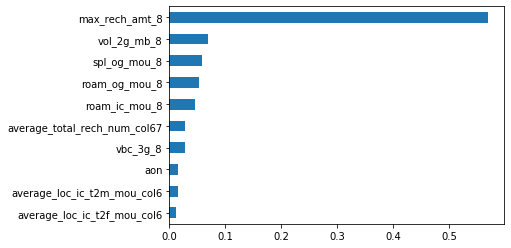

In [226]:
X = df
# Scaling all the variables to a range of 0 to 1
#from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
X = pd.DataFrame(scaler.transform(X))
X.columns = features

importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

Inferences: 

Features that impact the churn are as shown in above graph max reacharge amount for 8th month followed by 2g data value and special/roam outgoing calls.

Maximum Recharge Amount impacts the churning rate and hence can be a good indicator for business.

Outgoing and Incoming calls are also a good indicator.

8th month features are the ones that are impacting churn rate and hence again a good indicator for business

Random forest performs the best.